In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding

### Data Import & Initial Data Check

In [2]:
# Import training dataset
train_data = pd.read_csv('train.csv')

In [3]:
# Verify training data import
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Import test dataset
test_data = pd.read_csv('test.csv')

In [5]:
# Verify test data import
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Structural Investigation

In [6]:
# Check the size of each dataset
print(f'Size of Training Dataset (row, col): {train_data.shape}')
print(f'Size of Test Dataset (row, col): {test_data.shape}')

Size of Training Dataset (row, col): (614, 13)
Size of Test Dataset (row, col): (367, 12)


In [7]:
# Basic info of training dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train_data['Credit_History'].unique()

array([ 1.,  0., nan])

In [9]:
train_data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [10]:
train_data = train_data.drop(columns=['Loan_ID'])

In [11]:
# Defining type and role of each variable
roles = {
    'target': ['Loan_Status'],
    'categorical_features': ['Gender', 'Married','Dependents','Education', 'Self_Employed', 
                             'Credit_History', 'Property_Area', 'Loan_Amount_Term'],
    'numerical_features': ['ApplicantIncome', 'CoapplicantIncome', 
                           'LoanAmount']
}

### Quality Investigation

In [12]:
# Check for Missing Values and Visualize them using Heatmap
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

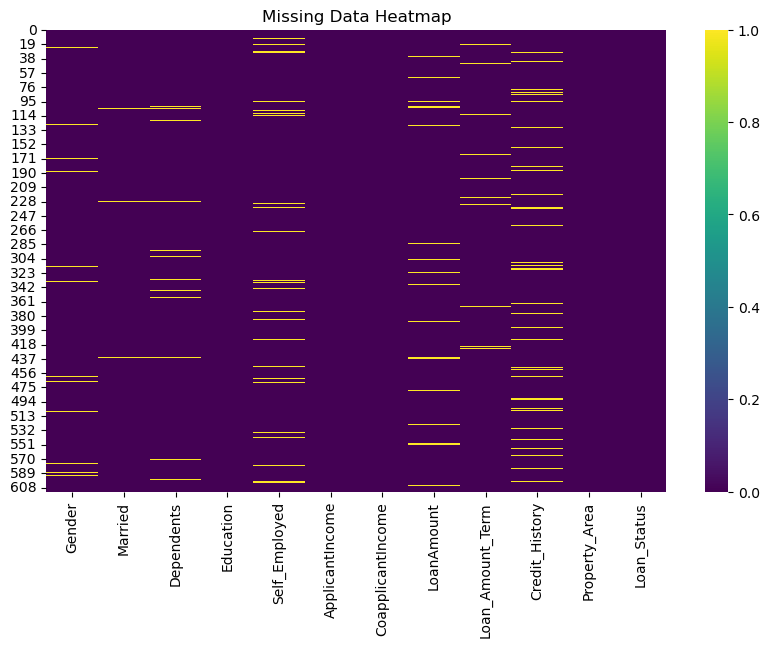

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [14]:
# Check for Duplicate Records
duplicates = train_data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [15]:
# Check for Unique Values and Inconsistencies (Categorical Variables)
for feature in roles['categorical_features']:
    unique_values = train_data[feature].unique()
    print(f"Unique values in {feature}: {unique_values}")

Unique values in Gender: ['Male' 'Female' nan]
Unique values in Married: ['No' 'Yes' nan]
Unique values in Dependents: ['0' '1' '2' '3+' nan]
Unique values in Education: ['Graduate' 'Not Graduate']
Unique values in Self_Employed: ['No' 'Yes' nan]
Unique values in Credit_History: [ 1.  0. nan]
Unique values in Property_Area: ['Urban' 'Rural' 'Semiurban']
Unique values in Loan_Amount_Term: [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


## Data Preparation

In [16]:
## Counts of each values in categorical variables before handling missing values
print('Categorical Variable: Value Counts Before Mode Imputation\n')
print('-------------------------------------------------------------')
print(train_data['Gender'].value_counts(),'\n')
print(train_data['Married'].value_counts(),'\n')
print(train_data['Dependents'].value_counts(),'\n')
print(train_data['Self_Employed'].value_counts(),'\n')
print(train_data['Credit_History'].value_counts(),'\n')
print(train_data['Loan_Amount_Term'].value_counts())

Categorical Variable: Value Counts Before Mode Imputation

-------------------------------------------------------------
Male      489
Female    112
Name: Gender, dtype: int64 

Yes    398
No     213
Name: Married, dtype: int64 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

No     500
Yes     82
Name: Self_Employed, dtype: int64 

1.0    475
0.0     89
Name: Credit_History, dtype: int64 

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [17]:
# Handling missing value for categorical variables - Mode Imputation
missing_cat = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']

for cat in missing_cat:
    mode_value = train_data[cat].mode()[0]  
    train_data[cat].fillna(mode_value, inplace=True)

print('[Missing Values]\n',train_data[missing_cat].isnull().sum(),'\n')
print('Categorical Variable: Value Counts After Mode Imputation\n')
print('-------------------------------------------------------------')
print(train_data['Gender'].value_counts(),'\n')
print(train_data['Married'].value_counts(),'\n')
print(train_data['Dependents'].value_counts(),'\n')
print(train_data['Self_Employed'].value_counts(),'\n')
print(train_data['Credit_History'].value_counts(),'\n')
print(train_data['Loan_Amount_Term'].value_counts())

[Missing Values]
 Gender              0
Married             0
Dependents          0
Self_Employed       0
Credit_History      0
Loan_Amount_Term    0
dtype: int64 

Categorical Variable: Value Counts After Mode Imputation

-------------------------------------------------------------
Male      502
Female    112
Name: Gender, dtype: int64 

Yes    401
No     213
Name: Married, dtype: int64 

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

No     532
Yes     82
Name: Self_Employed, dtype: int64 

1.0    525
0.0     89
Name: Credit_History, dtype: int64 

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [18]:
# Handling missing value for numerical variables - Median Imputation
median_value = train_data['LoanAmount'].median()
train_data['LoanAmount'].fillna(median_value, inplace=True)
print("Missing values in 'LoanAmount':", train_data['LoanAmount'].isnull().sum())

Missing values in 'LoanAmount': 0


In [19]:
# Check for Missing Values After They are Handled
train_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
## Convert 'Credit_History' and 'Loan_Amount_Term' to object data type
train_data['Credit_History'] = train_data['Credit_History'].astype(object)
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].astype(object)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    object 
 9   Credit_History     614 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 57.7+ KB


### Content Investigation

#### Checking For Distribution and Outliers in Numerical Variables

In [21]:
## Check for Summary Statistics - Numerical Variable
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443
std,6109.041673,2926.248369,84.107233
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,164.750000
max,81000.000000,41667.000000,700.000000


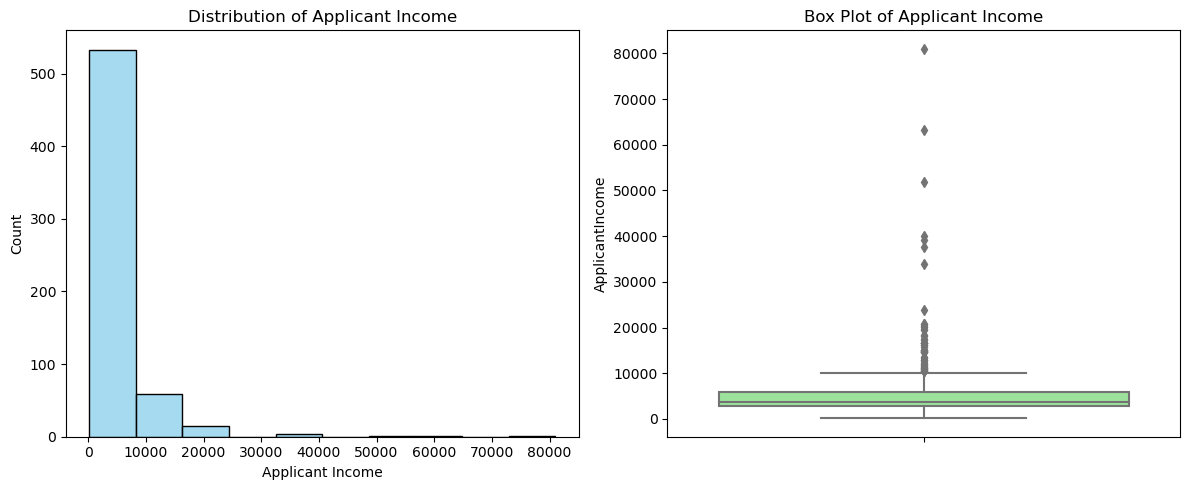

In [22]:
# Individual Variable Analysis - ApplicantIncome

# Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_data['ApplicantIncome'], bins=10, kde=False, color='skyblue')
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Count')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=train_data['ApplicantIncome'], color='lightgreen')
plt.title('Box Plot of Applicant Income')

plt.tight_layout()
plt.show()

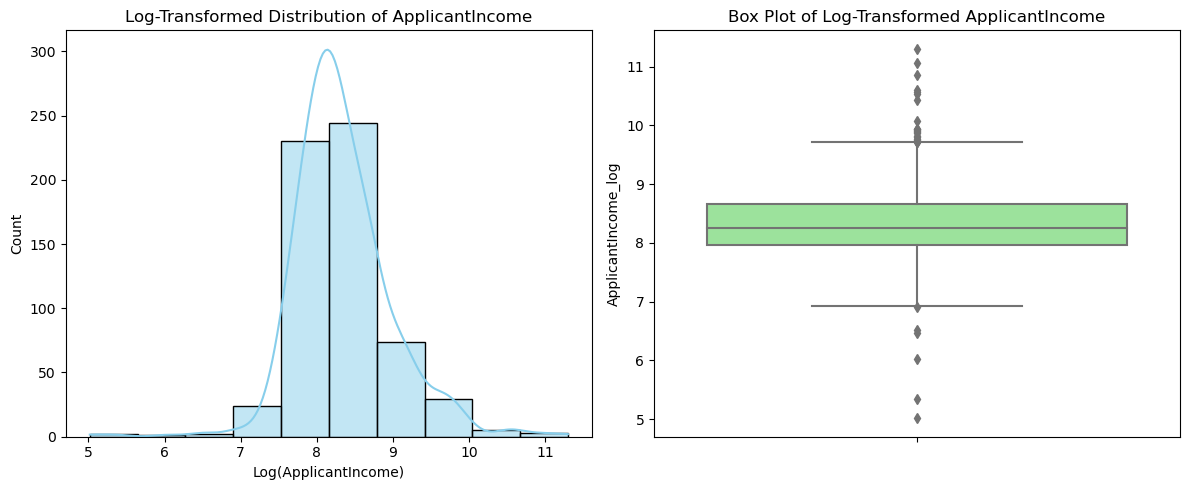

In [23]:
# Handling Extreme Values in 'ApplicantIncome' using Log Transformation

# Create a new column with log-transformed ApplicantIncome
train_data['ApplicantIncome_log'] = np.log1p(train_data['ApplicantIncome'])

# Histogram for transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_data['ApplicantIncome_log'], bins=10, kde=True, color='skyblue')
plt.title('Log-Transformed Distribution of ApplicantIncome')
plt.xlabel('Log(ApplicantIncome)')
plt.ylabel('Count')

# Box plot for transformation
plt.subplot(1, 2, 2)
sns.boxplot(y=train_data['ApplicantIncome_log'], color='lightgreen')
plt.title('Box Plot of Log-Transformed ApplicantIncome')

plt.tight_layout()
plt.show()

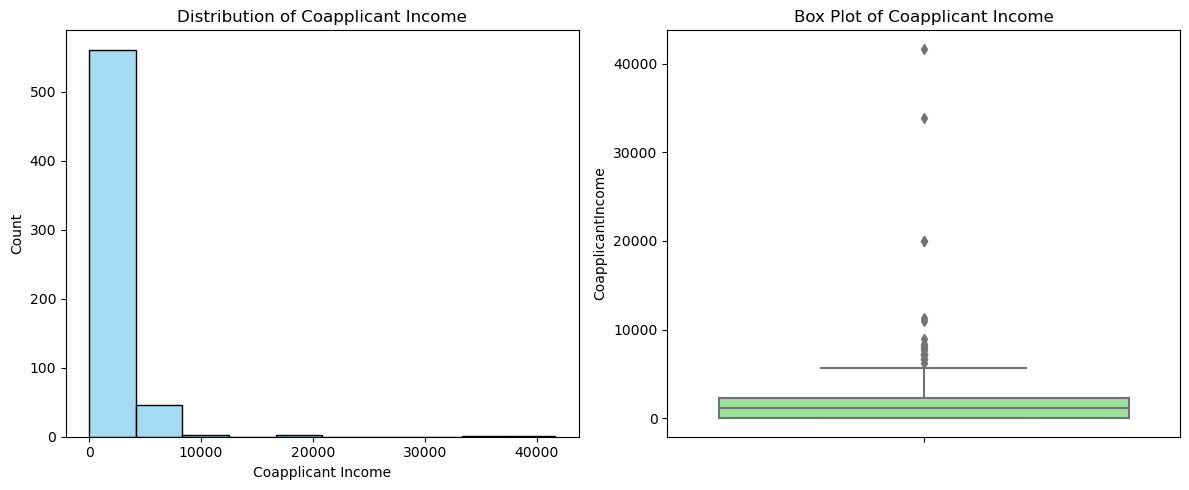

In [24]:
# Individual Variable Analysis - CoapplicantIncome

# Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_data['CoapplicantIncome'], bins=10, kde=False, color='skyblue')
plt.title('Distribution of Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Count')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=train_data['CoapplicantIncome'], color='lightgreen')
plt.title('Box Plot of Coapplicant Income')

plt.tight_layout()
plt.show()

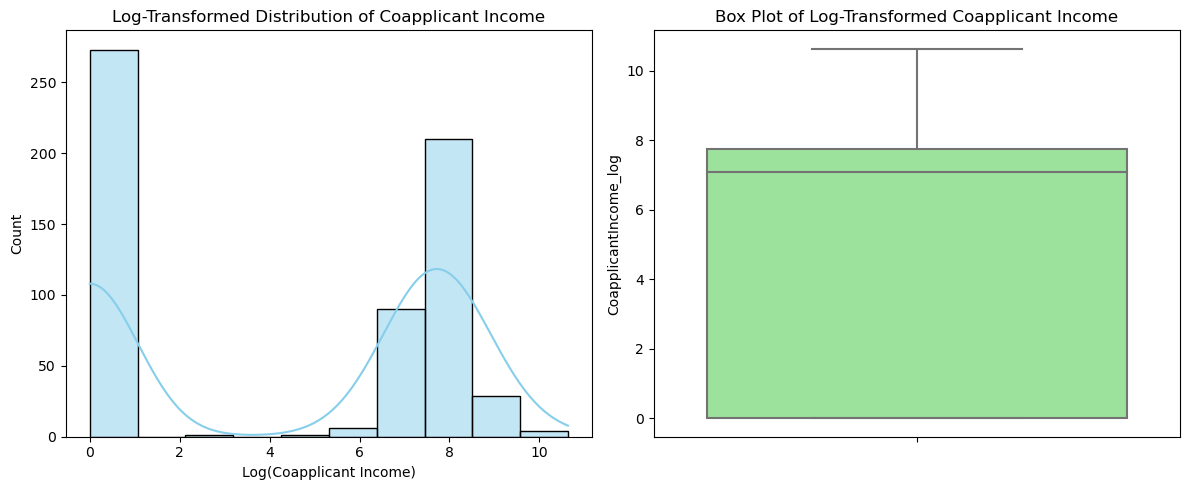

In [25]:
# Handling Extreme Values in 'CoapplicantIncome' using Log Transformation

# Create a new column with log-transformed CoapplicantIncome
train_data['CoapplicantIncome_log'] = np.log1p(train_data['CoapplicantIncome'])

# Histogram for transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_data['CoapplicantIncome_log'], bins=10, kde=True, color='skyblue')
plt.title('Log-Transformed Distribution of Coapplicant Income')
plt.xlabel('Log(Coapplicant Income)')
plt.ylabel('Count')

# Box plot for transformation
plt.subplot(1, 2, 2)
sns.boxplot(y=train_data['CoapplicantIncome_log'], color='lightgreen')
plt.title('Box Plot of Log-Transformed Coapplicant Income')

plt.tight_layout()
plt.show()

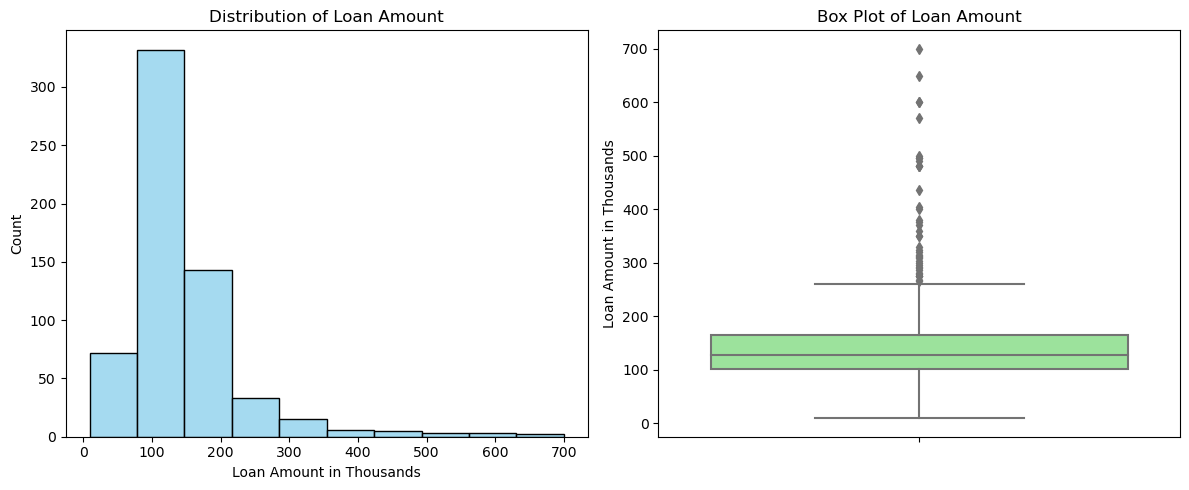

In [26]:
# Individual Variable Analysis - LoanAmount

# Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_data['LoanAmount'], bins=10, kde=False, color='skyblue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount in Thousands')
plt.ylabel('Count')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=train_data['LoanAmount'], color='lightgreen')
plt.title('Box Plot of Loan Amount')
plt.ylabel('Loan Amount in Thousands')

plt.tight_layout()
plt.show()

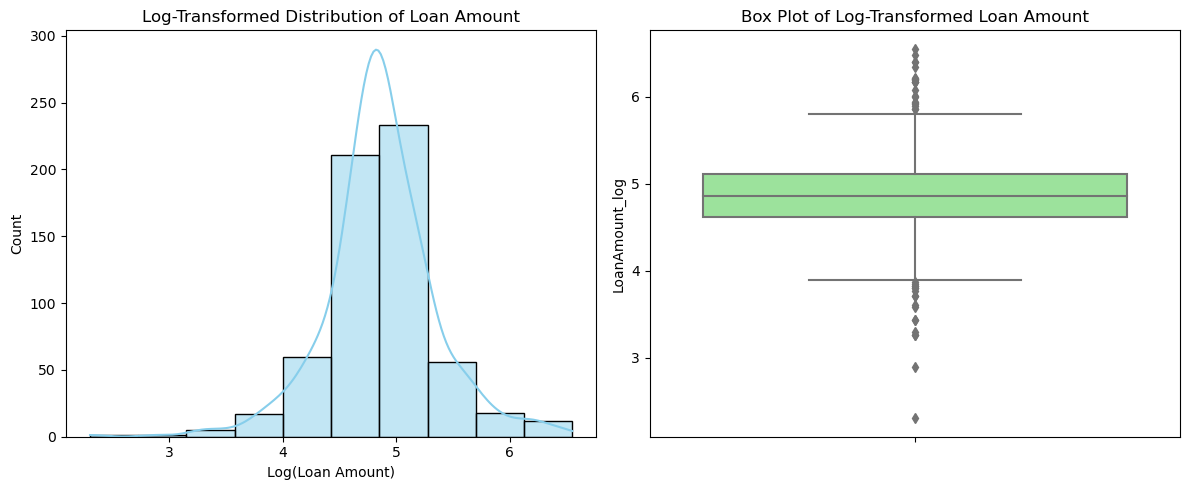

In [27]:
# Handling Extreme Values in 'LoanAmount' using Log Transformation

# Create a new column with log-transformed CoapplicantIncome
train_data['LoanAmount_log'] = np.log1p(train_data['LoanAmount'])

# Histogram for transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_data['LoanAmount_log'], bins=10, kde=True, color='skyblue')
plt.title('Log-Transformed Distribution of Loan Amount')
plt.xlabel('Log(Loan Amount)')
plt.ylabel('Count')

# Box plot for transformation
plt.subplot(1, 2, 2)
sns.boxplot(y=train_data['LoanAmount_log'], color='lightgreen')
plt.title('Box Plot of Log-Transformed Loan Amount')

plt.tight_layout()
plt.show()

#### Checking for Imbalances in Categorial Variables

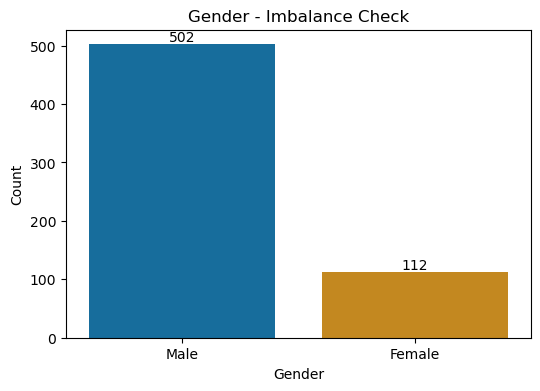

In [28]:
# Individual Variable Analysis - Gender

plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='Gender', palette='colorblind')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender - Imbalance Check')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

plt.show()

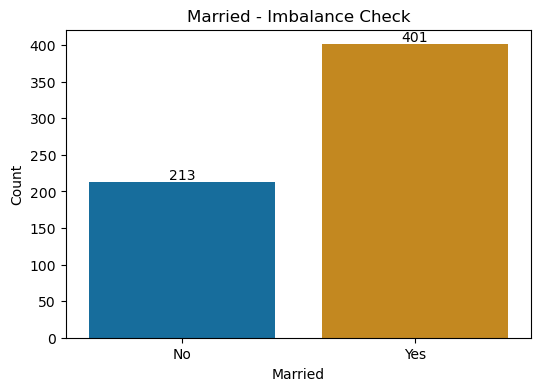

In [29]:
# Individual Variable Analysis - Married

plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='Married', palette='colorblind')
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Married - Imbalance Check')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

plt.show()

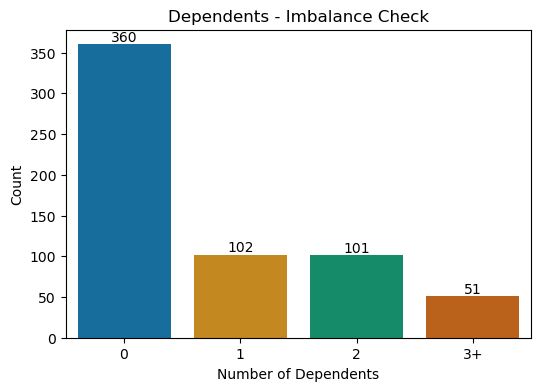

In [30]:
# Individual Variable Analysis - Dependents

plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='Dependents', palette='colorblind')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.title('Dependents - Imbalance Check')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

plt.show()

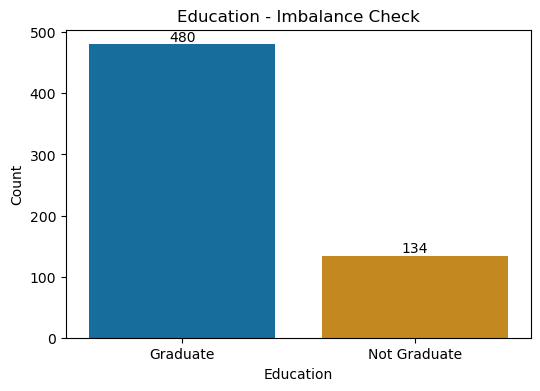

In [31]:
# Individual Variable Analysis - Education

plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='Education', palette='colorblind')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education - Imbalance Check')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

plt.show()

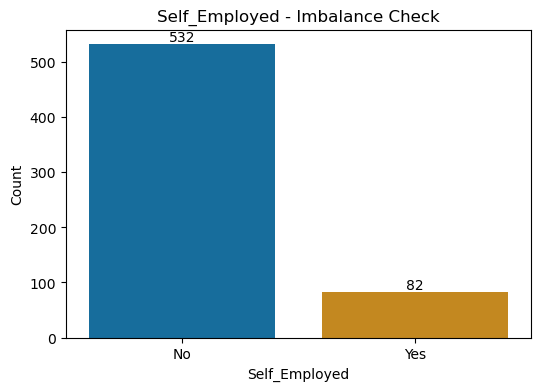

In [32]:
# Individual Variable Analysis - Self_Employed

plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='Self_Employed', palette='colorblind')
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.title('Self_Employed - Imbalance Check')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

plt.show()

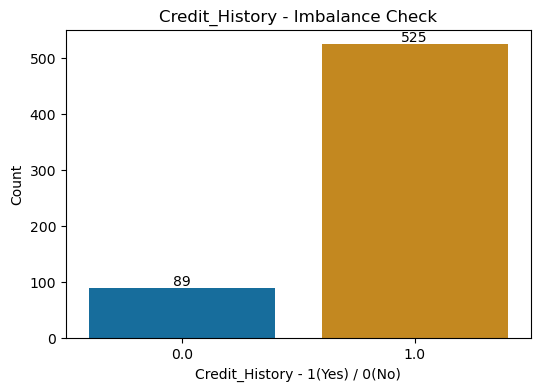

In [33]:
# Individual Variable Analysis - Credit_History

plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='Credit_History', palette='colorblind')
plt.xlabel('Credit_History - 1(Yes) / 0(No)')
plt.ylabel('Count')
plt.title('Credit_History - Imbalance Check')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

plt.show()

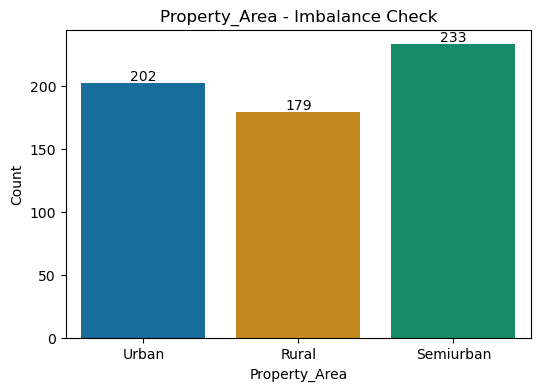

In [34]:
# Individual Variable Analysis - Property_Area

plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='Property_Area', palette='colorblind')
plt.xlabel('Property_Area')
plt.ylabel('Count')
plt.title('Property_Area - Imbalance Check')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

plt.show()

In [35]:
# Grouping 'Loan_Amount_Term' into smaller groups for better visualization

def categorize_loan_term(term):
    if term in [6, 12, 36, 60, 84]:
        return 'Short Term'
    elif term in [120,180, 240, 300]:
        return 'Medium Term'
    elif term in[350, 360]:
        return 'Long Term'
    elif term == 480:
        return 'Very Long Term'
    else:
        return 'Other'

train_data['Loan_Amount_Term_Grouped'] = train_data['Loan_Amount_Term'].apply(categorize_loan_term)
train_data['Loan_Amount_Term_Grouped'].value_counts()


Long Term         526
Medium Term        64
Very Long Term     15
Short Term          9
Name: Loan_Amount_Term_Grouped, dtype: int64

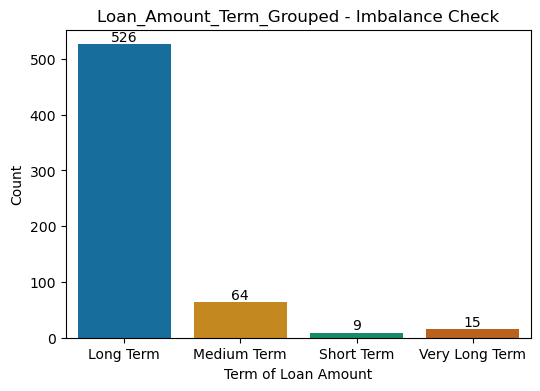

In [36]:
# Individual Variable Analysis - Loan_Amount_Term_Grouped

plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='Loan_Amount_Term_Grouped', palette='colorblind')
plt.xlabel('Term of Loan Amount')
plt.ylabel('Count')
plt.title('Loan_Amount_Term_Grouped - Imbalance Check')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

plt.show()

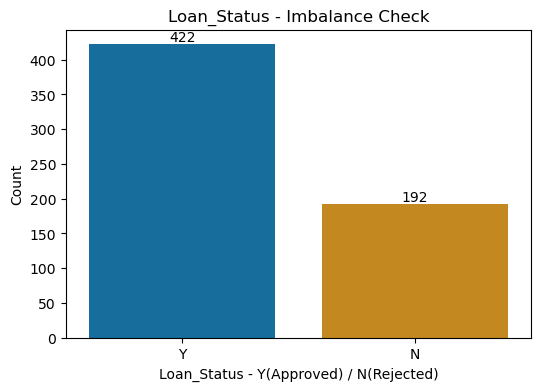

In [37]:
# Individual Variable Analysis - Loan_Status

plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='Loan_Status', palette='colorblind')
plt.xlabel('Loan_Status - Y(Approved) / N(Rejected)')
plt.ylabel('Count')
plt.title('Loan_Status - Imbalance Check')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

plt.show()

#### Handling Imbalances for Categorical Features (Excepts for Property_Area)

In [38]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [39]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Initialize the RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Imbalance data handling for 'Gender'
X_gender = train_data.drop(columns=['Gender'])
y_gender = train_data['Gender']
X_gender_resampled, y_gender_resampled = oversample.fit_resample(X_gender, y_gender)

print(f'After oversampling - Gender: {Counter(y_gender_resampled)}')

# Imbalance data handling for 'Married'
X_married = train_data.drop(columns=['Married'])
y_married = train_data['Married']
X_married_resampled, y_married_resampled = oversample.fit_resample(X_married, y_married)

print(f'After oversampling - Married: {Counter(y_married_resampled)}')

# Imbalance data handling for 'Dependents'
X_dependents = train_data.drop(columns=['Dependents'])
y_dependents = train_data['Dependents']
X_dependents_resampled, y_dependents_resampled = oversample.fit_resample(X_dependents, y_dependents)

print(f'After oversampling - Dependents: {Counter(y_dependents_resampled)}')

# Imbalance data handling for 'Education'
X_edu = train_data.drop(columns=['Education'])
y_edu = train_data['Education']
X_edu_resampled, y_edu_resampled = oversample.fit_resample(X_edu, y_edu)

print(f'After oversampling - Education: {Counter(y_edu_resampled)}')

# Imbalance data handling for 'Self_Employed'
X_selfEmployed = train_data.drop(columns=['Self_Employed'])
y_selfEmployed = train_data['Self_Employed']
X_selfEmployed_resampled, y_selfEmployed_resampled = oversample.fit_resample(X_selfEmployed, y_selfEmployed)

print(f'After oversampling - Self_Employed: {Counter(y_selfEmployed_resampled)}')

# Imbalance data handling for 'Credit_History'

# Convert 'Credit_History' to float temporarily for resampling
train_data['Credit_History'] = train_data['Credit_History'].astype(float) 

X_creditHist = train_data.drop(columns=['Credit_History'])
y_creditHist = train_data['Credit_History']
X_creditHist_resampled, y_creditHist_resampled = oversample.fit_resample(X_creditHist, y_creditHist)

print(f'After oversampling - Credit_History: {Counter(y_creditHist_resampled)}')

# Convert 'Credit_History' back to object type
y_creditHist_resampled = y_creditHist_resampled.astype(object)
train_data['Credit_History'] = train_data['Credit_History'].astype(object) 


# Imbalance data handling for 'Loan_Amount_Term_Grouped'
X_loanTerm = train_data.drop(columns=['Loan_Amount_Term_Grouped'])
y_loanTerm = train_data['Loan_Amount_Term_Grouped']
X_loanTerm_resampled, y_loanTerm_resampled = oversample.fit_resample(X_loanTerm, y_loanTerm)

print(f'After oversampling - Loan_Amount_Term_Grouped: {Counter(y_loanTerm_resampled)}')

# Imbalance data handling for 'Loan_Status'
X_loanStatus = train_data.drop(columns=['Loan_Status'])
y_loanStatus= train_data['Loan_Status']
X_loanStatus_resampled, y_loanStatus_resampled = oversample.fit_resample(X_loanStatus, y_loanStatus)

print(f'After oversampling - Loan_Status: {Counter(y_loanStatus_resampled)}')

After oversampling - Gender: Counter({'Male': 502, 'Female': 502})
After oversampling - Married: Counter({'No': 401, 'Yes': 401})
After oversampling - Dependents: Counter({'0': 360, '3+': 360, '1': 102, '2': 101})
After oversampling - Education: Counter({'Graduate': 480, 'Not Graduate': 480})
After oversampling - Self_Employed: Counter({'No': 532, 'Yes': 532})
After oversampling - Credit_History: Counter({1.0: 525, 0.0: 525})
After oversampling - Loan_Amount_Term_Grouped: Counter({'Long Term': 526, 'Short Term': 526, 'Medium Term': 64, 'Very Long Term': 15})
After oversampling - Loan_Status: Counter({'Y': 422, 'N': 422})


In [40]:
# Attach the resampled features to a new dataset
train_data_resampled = X_gender_resampled.copy()  

train_data_resampled['Gender'] = y_gender_resampled
train_data_resampled['Married'] = y_married_resampled
train_data_resampled['Dependents'] = y_dependents_resampled
train_data_resampled['Education'] = y_edu_resampled
train_data_resampled['Self_Employed'] = y_selfEmployed_resampled
train_data_resampled['Credit_History'] = y_creditHist_resampled
train_data_resampled['Loan_Amount_Term_Grouped'] = y_loanTerm_resampled
train_data_resampled['Loan_Status'] = y_loanStatus_resampled

# Step 3: Verify the shape and contents of the combined dataset to confirm successful merging
print(train_data_resampled.shape)
train_data_resampled.head()

(1004, 16)


,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_Grouped,Gender
0,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,8.674197,0.000000,4.859812,Long Term,Male
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.430327,7.319202,4.859812,Long Term,Male
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,8.006701,0.000000,4.204693,Long Term,Male
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.857094,7.765993,4.795791,Long Term,Male
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,8.699681,0.000000,4.955827,Long Term,Male


In [41]:
train_data_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Married                   802 non-null    object 
 1   Dependents                923 non-null    object 
 2   Education                 960 non-null    object 
 3   Self_Employed             1004 non-null   object 
 4   ApplicantIncome           1004 non-null   int64  
 5   CoapplicantIncome         1004 non-null   float64
 6   LoanAmount                1004 non-null   float64
 7   Loan_Amount_Term          1004 non-null   object 
 8   Credit_History            1004 non-null   object 
 9   Property_Area             1004 non-null   object 
 10  Loan_Status               844 non-null    object 
 11  ApplicantIncome_log       1004 non-null   float64
 12  CoapplicantIncome_log     1004 non-null   float64
 13  LoanAmount_log            1004 non-null   float64
 14  Loan_Amo

In [42]:
# Handling missing value for categorical variables - Mode Imputation (After Resampling)
missing_cat_resampled = ['Married', 'Dependents', 'Education', 'Loan_Status']

for cat in missing_cat_resampled:
    mode_value_resampled = train_data_resampled[cat].mode()[0]  
    train_data_resampled[cat].fillna(mode_value_resampled, inplace=True)

print('[Missing Values]\n',train_data_resampled[missing_cat_resampled].isnull().sum(),'\n')
print('Categorical Variable: Value Counts After Mode Imputation\n')
print('-------------------------------------------------------------')
print(train_data['Married'].value_counts(),'\n')
print(train_data['Dependents'].value_counts(),'\n')
print(train_data['Education'].value_counts(),'\n')
print(train_data['Loan_Status'].value_counts())

[Missing Values]
 Married        0
Dependents     0
Education      0
Loan_Status    0
dtype: int64 

Categorical Variable: Value Counts After Mode Imputation

-------------------------------------------------------------
Yes    401
No     213
Name: Married, dtype: int64 

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

Y    422
N    192
Name: Loan_Status, dtype: int64


In [43]:
# Check for missing value
train_data_resampled.isnull().sum()

Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
ApplicantIncome_log         0
CoapplicantIncome_log       0
LoanAmount_log              0
Loan_Amount_Term_Grouped    0
Gender                      0
dtype: int64

#### Exploring Relationships Among Variables

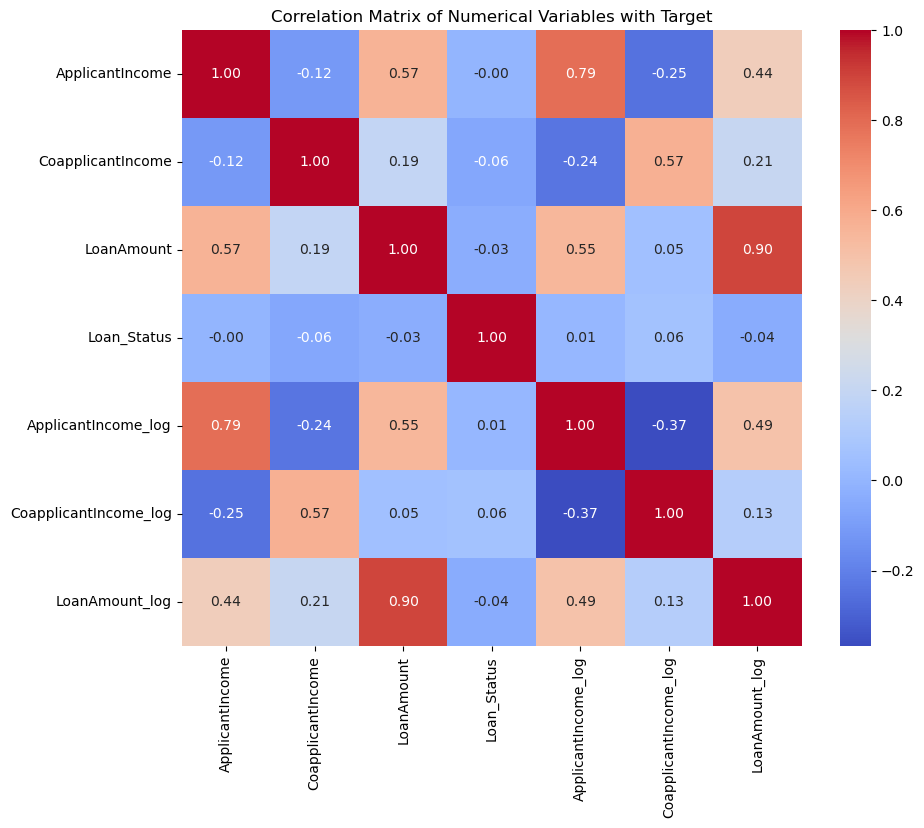

In [44]:
# Correlation for numerical variables

# Enconding 'Loan_Status'
data_encoded = train_data.copy()
data_encoded['Loan_Status'] = data_encoded['Loan_Status'].map({'Y': 1, 'N': 0})

# Correlation matrix and visualization
corr_matrix = data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix of Numerical Variables with Target")
plt.show()

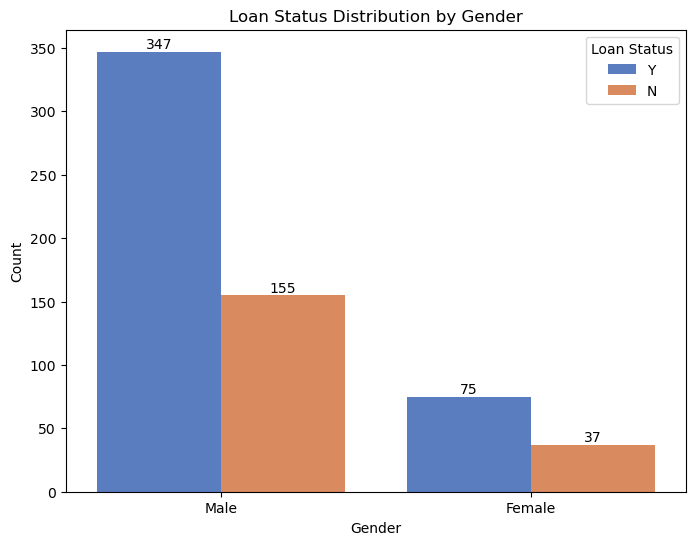

In [45]:
# Visual Exploration: Gender vs Loan_Status
plt.figure(figsize=(8, 6))

plot = sns.countplot(data=train_data, x='Gender', hue='Loan_Status', palette='muted')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', 
                  xytext=(0, 5), textcoords='offset points')

plt.title("Loan Status Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Loan Status', loc='upper right')
plt.show()

In [46]:
# Statistical Exploration: Gender vs Loan_Status
from scipy.stats import chi2_contingency

# Cross-tabulation
gender_loanStatus_tab = pd.crosstab(train_data['Gender'], train_data_resampled['Loan_Status'])
print(gender_loanStatus_tab, '\n')

# Chi-Square Test
chi2_stat, p_val, dof, expected = chi2_contingency(gender_loanStatus_tab)

print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-value: {p_val}')
print(f'Degrees of Freedom: {dof}')
print(f'Expected Frequency Table:\n{expected}')

Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347 

Chi-Square Statistic: 0.11087854691241235
P-value: 0.7391461310869638
Degrees of Freedom: 1
Expected Frequency Table:
[[ 35.0228013  76.9771987]
 [156.9771987 345.0228013]]


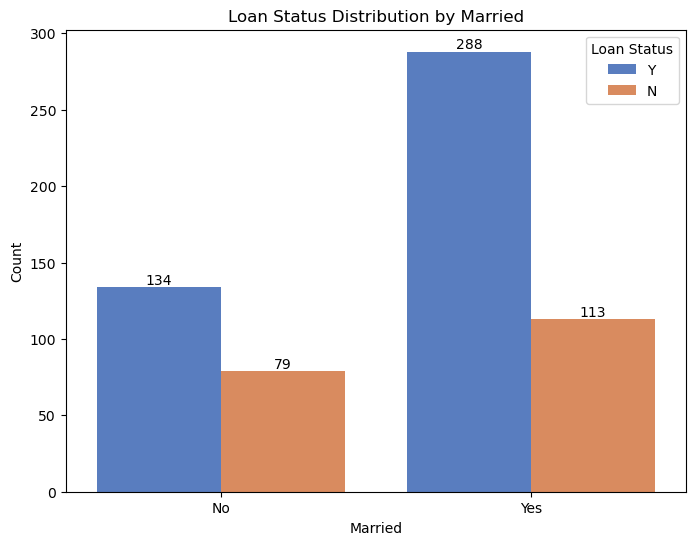

In [47]:
# Visual Exploration: Married vs Loan_Status
plt.figure(figsize=(8, 6))

plot = sns.countplot(data=train_data, x='Married', hue='Loan_Status', palette='muted')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', 
                  xytext=(0, 5), textcoords='offset points')

plt.title("Loan Status Distribution by Married")
plt.xlabel("Married")
plt.ylabel("Count")
plt.legend(title='Loan Status', loc='upper right')
plt.show()

In [48]:
# Statistical Exploration: Married vs Loan_Status

# Cross-tabulation
married_loanStatus_tab = pd.crosstab(train_data['Married'], train_data['Loan_Status'])
print(married_loanStatus_tab, '\n')

# Chi-Square Test
chi2_stat, p_val, dof, expected = chi2_contingency(married_loanStatus_tab)

print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-value: {p_val}')
print(f'Degrees of Freedom: {dof}')
print(f'Expected Frequency Table:\n{expected}')

Loan_Status    N    Y
Married              
No            79  134
Yes          113  288 

Chi-Square Statistic: 4.73187557933362
P-value: 0.029608580862582116
Degrees of Freedom: 1
Expected Frequency Table:
[[ 66.60586319 146.39413681]
 [125.39413681 275.60586319]]


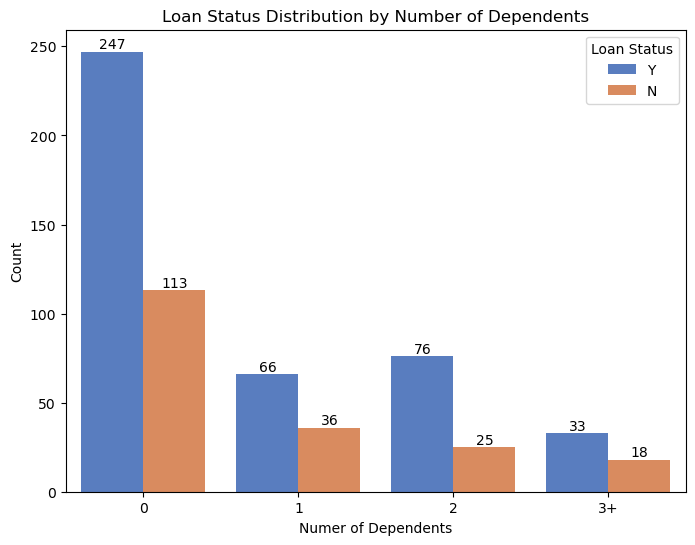

In [49]:
# Visual Exploration: Dependents vs Loan_Status
plt.figure(figsize=(8, 6))

plot = sns.countplot(data=train_data, x='Dependents', hue='Loan_Status', palette='muted')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', 
                  xytext=(0, 5), textcoords='offset points')

plt.title("Loan Status Distribution by Number of Dependents")
plt.xlabel("Numer of Dependents")
plt.ylabel("Count")
plt.legend(title='Loan Status', loc='upper right')
plt.show()

In [50]:
# Statistical Exploration: Dependents vs Loan_Status

# Cross-tabulation
dependents_loanStatus_tab = pd.crosstab(train_data['Dependents'], train_data['Loan_Status'])
print(dependents_loanStatus_tab, '\n')

# Chi-Square Test
chi2_stat, p_val, dof, expected = chi2_contingency(dependents_loanStatus_tab)

print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-value: {p_val}')
print(f'Degrees of Freedom: {dof}')
print(f'Expected Frequency Table:\n{expected}')

Loan_Status    N    Y
Dependents           
0            113  247
1             36   66
2             25   76
3+            18   33 

Chi-Square Statistic: 3.1513990012324227
P-value: 0.3688663081366005
Degrees of Freedom: 3
Expected Frequency Table:
[[112.5732899  247.4267101 ]
 [ 31.89576547  70.10423453]
 [ 31.58306189  69.41693811]
 [ 15.94788274  35.05211726]]


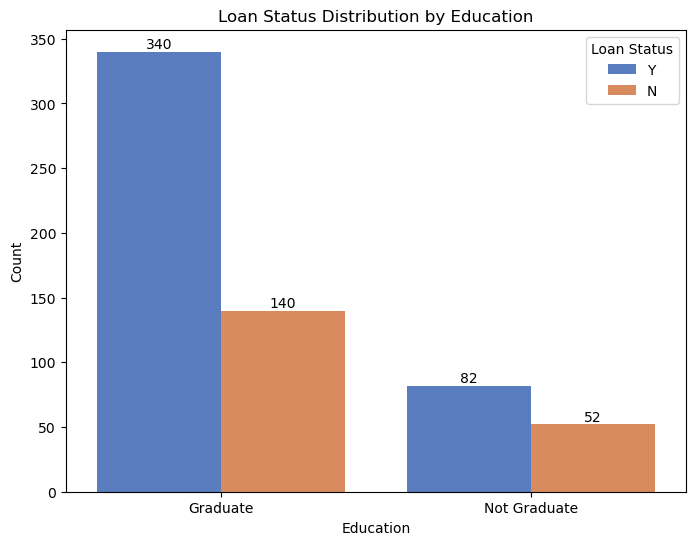

In [51]:
# Visual Exploration: Education vs Loan_Status
plt.figure(figsize=(8, 6))

plot = sns.countplot(data=train_data, x='Education', hue='Loan_Status', palette='muted')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', 
                  xytext=(0, 5), textcoords='offset points')

plt.title("Loan Status Distribution by Education")
plt.xlabel("Education")
plt.ylabel("Count")
plt.legend(title='Loan Status', loc='upper right')
plt.show()

In [52]:
# Statistical Exploration: Education vs Loan_Status

# Cross-tabulation
education_loanStatus_tab = pd.crosstab(train_data['Education'], train_data['Loan_Status'])
print(education_loanStatus_tab, '\n')

# Chi-Square Test
chi2_stat, p_val, dof, expected = chi2_contingency(education_loanStatus_tab)

print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-value: {p_val}')
print(f'Degrees of Freedom: {dof}')
print(f'Expected Frequency Table:\n{expected}')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82 

Chi-Square Statistic: 4.091490413303621
P-value: 0.04309962129357355
Degrees of Freedom: 1
Expected Frequency Table:
[[150.09771987 329.90228013]
 [ 41.90228013  92.09771987]]


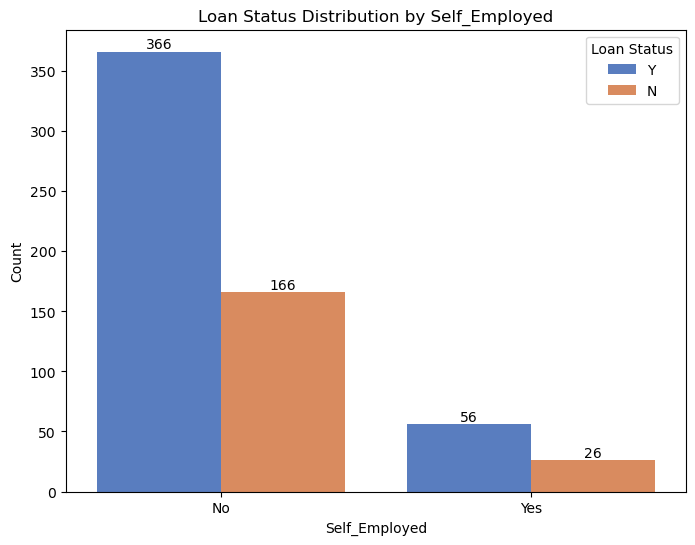

In [53]:
# Visual Exploration: Self_Employed vs Loan_Status
plt.figure(figsize=(8, 6))

plot = sns.countplot(data=train_data, x='Self_Employed', hue='Loan_Status', palette='muted')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', 
                  xytext=(0, 5), textcoords='offset points')

plt.title("Loan Status Distribution by Self_Employed")
plt.xlabel("Self_Employed")
plt.ylabel("Count")
plt.legend(title='Loan Status', loc='upper right')
plt.show()

In [54]:
# Statistical Exploration: Self_Employed vs Loan_Status

# Cross-tabulation
selfEmployed_loanStatus_tab = pd.crosstab(train_data['Self_Employed'], train_data['Loan_Status'])
print(selfEmployed_loanStatus_tab, '\n')

# Chi-Square Test
chi2_stat, p_val, dof, expected = chi2_contingency(selfEmployed_loanStatus_tab)

print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-value: {p_val}')
print(f'Degrees of Freedom: {dof}')
print(f'Expected Frequency Table:\n{expected}')

Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56 

Chi-Square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 1
Expected Frequency Table:
[[166.35830619 365.64169381]
 [ 25.64169381  56.35830619]]


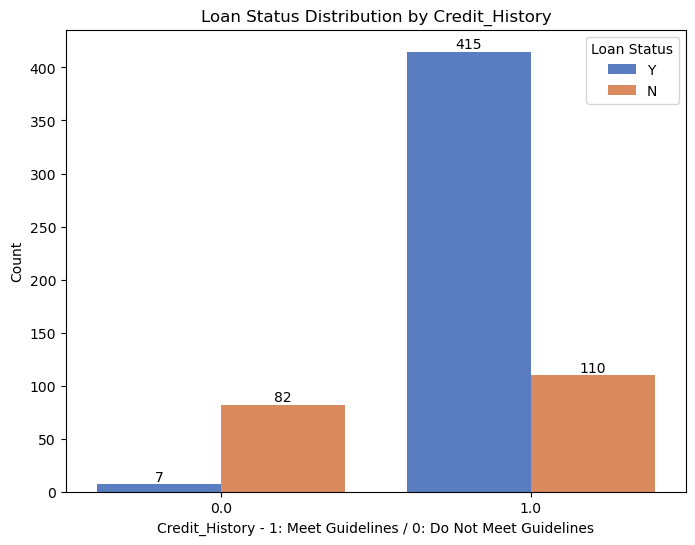

In [55]:
# Visual Exploration: Credit_History vs Loan_Status
plt.figure(figsize=(8, 6))

plot = sns.countplot(data=train_data, x='Credit_History', hue='Loan_Status', palette='muted')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', 
                  xytext=(0, 5), textcoords='offset points')

plt.title("Loan Status Distribution by Credit_History")
plt.xlabel("Credit_History - 1: Meet Guidelines / 0: Do Not Meet Guidelines")
plt.ylabel("Count")
plt.legend(title='Loan Status', loc='upper right')
plt.show()

In [56]:
# Statistical Exploration: Credit_History vs Loan_Status

# Cross-tabulation
creditHist_loanStatus_tab = pd.crosstab(train_data['Credit_History'], train_data['Loan_Status'])
print(creditHist_loanStatus_tab, '\n')

# Chi-Square Test
chi2_stat, p_val, dof, expected = chi2_contingency(creditHist_loanStatus_tab)

print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-value: {p_val}')
print(f'Degrees of Freedom: {dof}')
print(f'Expected Frequency Table:\n{expected}')

Loan_Status       N    Y
Credit_History          
0.0              82    7
1.0             110  415 

Chi-Square Statistic: 176.1145746235241
P-value: 3.4183499979091188e-40
Degrees of Freedom: 1
Expected Frequency Table:
[[ 27.83061889  61.16938111]
 [164.16938111 360.83061889]]


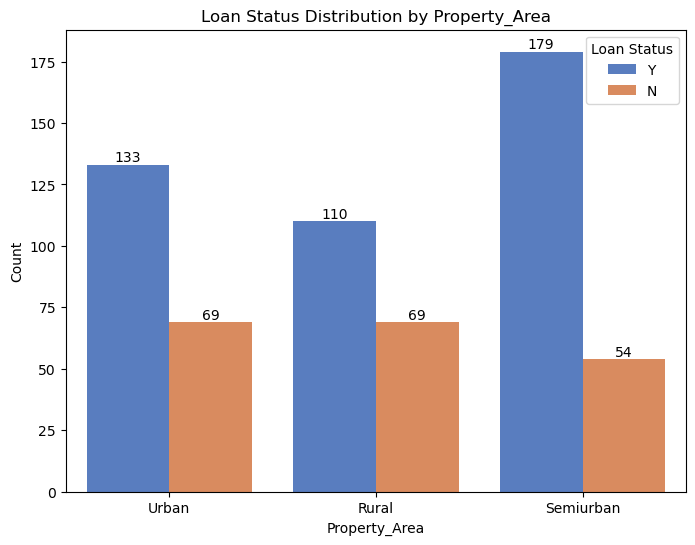

In [57]:
# Visual Exploration: Property_Area vs Loan_Status
plt.figure(figsize=(8, 6))

plot = sns.countplot(data=train_data, x='Property_Area', hue='Loan_Status', palette='muted')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', 
                  xytext=(0, 5), textcoords='offset points')

plt.title("Loan Status Distribution by Property_Area")
plt.xlabel("Property_Area")
plt.ylabel("Count")
plt.legend(title='Loan Status', loc='upper right')
plt.show()

In [58]:
# Statistical Exploration: Property_Area vs Loan_Status

# Cross-tabulation
propertyA_loanStatus_tab = pd.crosstab(train_data['Property_Area'], train_data['Loan_Status'])
print(propertyA_loanStatus_tab, '\n')

# Chi-Square Test
chi2_stat, p_val, dof, expected = chi2_contingency(propertyA_loanStatus_tab)

print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-value: {p_val}')
print(f'Degrees of Freedom: {dof}')
print(f'Expected Frequency Table:\n{expected}')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133 

Chi-Square Statistic: 12.297623130485675
P-value: 0.0021360187811644937
Degrees of Freedom: 2
Expected Frequency Table:
[[ 55.97394137 123.02605863]
 [ 72.85993485 160.14006515]
 [ 63.16612378 138.83387622]]


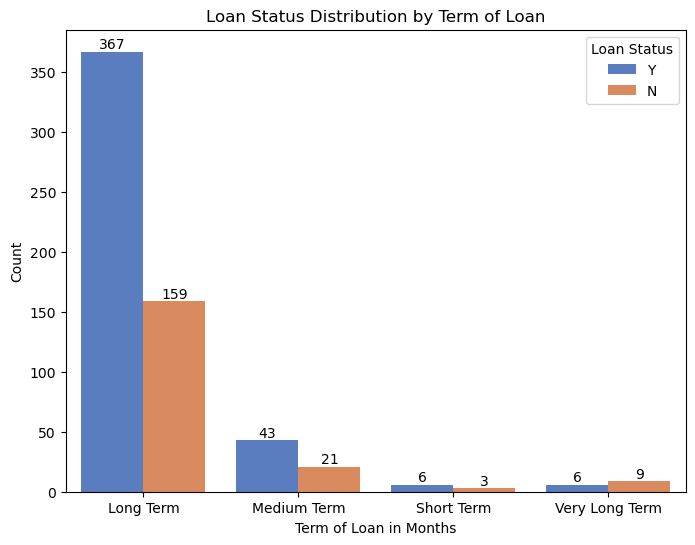

In [59]:
# Visual Exploration: Loan_Amount_Term_Grouped vs Loan_Status
plt.figure(figsize=(8, 6))

plot = sns.countplot(data=train_data, x='Loan_Amount_Term_Grouped', hue='Loan_Status', palette='muted')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', 
                  xytext=(0, 5), textcoords='offset points')

plt.title("Loan Status Distribution by Term of Loan")
plt.xlabel("Term of Loan in Months")
plt.ylabel("Count")
plt.legend(title='Loan Status', loc='upper right')
plt.show()

In [60]:
# Statistical Exploration: Loan_Amount_Term_Grouped vs Loan_Status

# Cross-tabulation
loanTermGroup_loanStatus_tab = pd.crosstab(train_data['Loan_Amount_Term_Grouped'], train_data['Loan_Status'])
print(loanTermGroup_loanStatus_tab, '\n')

# Chi-Square Test
chi2_stat, p_val, dof, expected = chi2_contingency(loanTermGroup_loanStatus_tab)

print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-value: {p_val}')
print(f'Degrees of Freedom: {dof}')
print(f'Expected Frequency Table:\n{expected}')

Loan_Status                 N    Y
Loan_Amount_Term_Grouped          
Long Term                 159  367
Medium Term                21   43
Short Term                  3    6
Very Long Term              9    6 

Chi-Square Statistic: 6.11517948761086
P-value: 0.10613899725806238
Degrees of Freedom: 3
Expected Frequency Table:
[[164.48208469 361.51791531]
 [ 20.01302932  43.98697068]
 [  2.81433225   6.18566775]
 [  4.69055375  10.30944625]]


#### Encoding and Preparing for Modeling

In [61]:
# Label Encoding 'Married', 'Education', 'Credit_History', 'Loan_Status', 'Gender', 'Self_Employed'
train_data_resampled['Gender_encoded'] = train_data_resampled['Gender'].map({'Male': 1, 'Female': 0})
train_data_resampled['Married_encoded'] = train_data_resampled['Married'].map({'Yes': 1, 'No': 0})
train_data_resampled['Education_encoded'] = train_data_resampled['Education'].map({'Graduate': 1, 'Not Graduate': 0})
train_data_resampled['Self_Employed_encoded'] = train_data_resampled['Self_Employed'].map({'Yes': 1, 'No': 0})
train_data_resampled['Credit_History_encoded'] = train_data_resampled['Credit_History'].astype(int)
train_data_resampled['Loan_Status_encoded'] = train_data_resampled['Loan_Status'].map({'Y': 1, 'N': 0})

# One-hot encoding for 'Dependents'
Dependents_encoded = pd.get_dummies(train_data_resampled['Dependents'], prefix='Dependents')
train_data_resampled = pd.concat([train_data_resampled, Dependents_encoded], axis=1)

# One-hot encoding for 'Property_Area'
Property_Area_encoded = pd.get_dummies(train_data_resampled['Property_Area'], prefix='Property_Area')
train_data_resampled = pd.concat([train_data_resampled, Property_Area_encoded], axis=1)

# One-hot encoding for 'Loan_Amount_Term_Grouped'
LoanTerm_encoded = pd.get_dummies(train_data_resampled['Loan_Amount_Term_Grouped'], prefix='Loan_Amount_Term_Grouped')
train_data_resampled = pd.concat([train_data_resampled, LoanTerm_encoded], axis=1)

# Display the outcome after encoding
encoded_columns = ['Gender_encoded', 'Married_encoded', 'Education_encoded', 'Self_Employed_encoded', 'Credit_History_encoded', 'Loan_Status_encoded'] +  list(Dependents_encoded.columns) + list(Property_Area_encoded.columns) + list(LoanTerm_encoded.columns)
train_data_resampled[encoded_columns].head()

,Gender_encoded,Married_encoded,Education_encoded,Self_Employed_encoded,Credit_History_encoded,Loan_Status_encoded,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_Grouped_Long Term,Loan_Amount_Term_Grouped_Medium Term,Loan_Amount_Term_Grouped_Short Term,Loan_Amount_Term_Grouped_Very Long Term
0,1,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0
1,1,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0
2,1,1,1,1,1,1,1,0,0,0,0,0,1,1,0,0,0
3,1,1,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0
4,1,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0


## Modeling

In [62]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


# Splitting Data into Training and Evaluation Set

# Define features and target variable
X = train_data_resampled[['Gender_encoded', 'Married_encoded', 'Education_encoded', 'Self_Employed_encoded', 'Credit_History_encoded', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Amount_Term_Grouped_Long Term', 'Loan_Amount_Term_Grouped_Medium Term', 'Loan_Amount_Term_Grouped_Short Term', 'Loan_Amount_Term_Grouped_Very Long Term', 'ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log']]
y = train_data_resampled['Loan_Status_encoded']

# Step 1: Split the dataset - 80(train) / 20(validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Initial Comparison

### Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

# Step 2: Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train the model
dt_model.fit(X_train, y_train)

# Step 3: Make predictions on the validation set
y_pred_dt = dt_model.predict(X_val)
y_proba_dt = dt_model.predict_proba(X_val)[:, 1]

# Evaluation Metrics
accuracy_dt = accuracy_score(y_val, y_pred_dt)
precision_dt = precision_score(y_val, y_pred_dt)
recall_dt = recall_score(y_val, y_pred_dt)
f1_dt = f1_score(y_val, y_pred_dt)
auc_roc_dt = roc_auc_score(y_val, y_proba_dt)
conf_matrix_dt = confusion_matrix(y_val, y_pred_dt)

# Display the metrics
print("Decision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1 Score: {f1_dt:.2f}")
print(f"AUC-ROC: {auc_roc_dt:.2f}")
print("Confusion Matrix:")
print(conf_matrix_dt)
print('')

# Cross-validation for Decision Tree
cross_val_scores_dt = cross_validate(dt_model, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
print(f"Cross-Validation Accuracy: {cross_val_scores_dt['test_accuracy'].mean():.2f} ± {cross_val_scores_dt['test_accuracy'].std():.2f}")
print(f"Cross-Validation Precision: {cross_val_scores_dt['test_precision'].mean():.2f} ± {cross_val_scores_dt['test_precision'].std():.2f}")
print(f"Cross-Validation Recall: {cross_val_scores_dt['test_recall'].mean():.2f} ± {cross_val_scores_dt['test_recall'].std():.2f}")
print(f"Cross-Validation F1 Score: {cross_val_scores_dt['test_f1'].mean():.2f} ± {cross_val_scores_dt['test_f1'].std():.2f}")

Decision Tree Model Evaluation:
Accuracy: 0.81
Precision: 0.79
Recall: 0.80
F1 Score: 0.79
AUC-ROC: 0.81
Confusion Matrix:
[[87 20]
 [19 75]]

Cross-Validation Accuracy: 0.84 ± 0.03
Cross-Validation Precision: 0.80 ± 0.05
Cross-Validation Recall: 0.82 ± 0.03
Cross-Validation F1 Score: 0.81 ± 0.03


### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Step 2: Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the validation set
y_pred_rf = rf_model.predict(X_val)
y_proba_rf = rf_model.predict_proba(X_val)[:, 1]


# Evaluation Metrics
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)
auc_roc_rf = roc_auc_score(y_val, y_proba_rf)
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)

# Display the metrics
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print(f"AUC-ROC: {auc_roc_rf:.2f}")
print("Confusion Matrix:")
print(conf_matrix_rf)

# Cross-validation for Random Forest
cross_val_scores_rf = cross_validate(rf_model, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
print(f"Cross-Validation Accuracy: {cross_val_scores_rf['test_accuracy'].mean():.2f} ± {cross_val_scores_rf['test_accuracy'].std():.2f}")
print(f"Cross-Validation Precision: {cross_val_scores_rf['test_precision'].mean():.2f} ± {cross_val_scores_rf['test_precision'].std():.2f}")
print(f"Cross-Validation Recall: {cross_val_scores_rf['test_recall'].mean():.2f} ± {cross_val_scores_rf['test_recall'].std():.2f}")
print(f"Cross-Validation F1 Score: {cross_val_scores_rf['test_f1'].mean():.2f} ± {cross_val_scores_rf['test_f1'].std():.2f}")

Random Forest Model Evaluation:
Accuracy: 0.85
Precision: 0.80
Recall: 0.89
F1 Score: 0.84
AUC-ROC: 0.90
Confusion Matrix:
[[86 21]
 [10 84]]
Cross-Validation Accuracy: 0.87 ± 0.03
Cross-Validation Precision: 0.80 ± 0.05
Cross-Validation Recall: 0.93 ± 0.03
Cross-Validation F1 Score: 0.86 ± 0.03


### Naive Bayes

In [65]:
# Discretizing Numerical Features
train_data_resampled['ApplicantIncome_binned'] = pd.qcut(train_data_resampled['ApplicantIncome_log'], q=4, labels=[1, 2, 3, 4])
train_data_resampled['CoapplicantIncome_binned'] = pd.qcut(train_data_resampled['CoapplicantIncome_log'], q=2, labels=[1], duplicates='drop')
train_data_resampled['LoanAmount_binned'] = pd.qcut(train_data_resampled['LoanAmount_log'], q=4, labels=[1, 2, 3, 4])

# Define new feature set
X_nb = train_data_resampled[['Gender_encoded', 'Married_encoded', 'Education_encoded', 'Self_Employed_encoded', 'Credit_History_encoded', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Amount_Term_Grouped_Long Term', 'Loan_Amount_Term_Grouped_Medium Term', 'Loan_Amount_Term_Grouped_Short Term', 'Loan_Amount_Term_Grouped_Very Long Term', 'ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log', 'ApplicantIncome_binned','CoapplicantIncome_binned', 'LoanAmount_binned']]
y_nb = train_data_resampled['Loan_Status_encoded']

# Split the new dataset into training and validation sets
X_train_nb, X_val_nb, y_train_nb, y_val_nb = train_test_split(X_nb,y_nb, test_size=0.2, random_state=42)

In [66]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_nb, y_train_nb)

# Make predictions and evaluate
y_pred_nb = nb_model.predict(X_val_nb)
y_proba_nb = nb_model.predict_proba(X_val_nb)[:, 1]


# Evaluation metrics
accuracy_nb = accuracy_score(y_val_nb, y_pred_nb)
precision_nb = precision_score(y_val_nb, y_pred_nb)
recall_nb = recall_score(y_val_nb, y_pred_nb)
f1_nb = f1_score(y_val_nb, y_pred_nb)
auc_roc_nb = roc_auc_score(y_val, y_proba_nb)
conf_matrix_nb = confusion_matrix(y_val_nb, y_pred_nb)

# Display the metrics
print("Multinomial Naive Bayes Model Evaluation:")
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print(f"F1 Score: {f1_nb:.2f}")
print(f"AUC-ROC: {auc_roc_nb:.2f}")
print("Confusion Matrix:")
print(conf_matrix_nb)

# Cross-validation for Naive Bayes
cross_val_scores_nb = cross_validate(nb_model, X_train_nb, y_train_nb, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
print(f"Cross-Validation Accuracy: {cross_val_scores_nb['test_accuracy'].mean():.2f} ± {cross_val_scores_nb['test_accuracy'].std():.2f}")
print(f"Cross-Validation Precision: {cross_val_scores_nb['test_precision'].mean():.2f} ± {cross_val_scores_nb['test_precision'].std():.2f}")
print(f"Cross-Validation Recall: {cross_val_scores_nb['test_recall'].mean():.2f} ± {cross_val_scores_nb['test_recall'].std():.2f}")
print(f"Cross-Validation F1 Score: {cross_val_scores_nb['test_f1'].mean():.2f} ± {cross_val_scores_nb['test_f1'].std():.2f}")

Multinomial Naive Bayes Model Evaluation:
Accuracy: 0.82
Precision: 0.74
Recall: 0.95
F1 Score: 0.83
AUC-ROC: 0.88
Confusion Matrix:
[[75 32]
 [ 5 89]]
Cross-Validation Accuracy: 0.80 ± 0.04
Cross-Validation Precision: 0.69 ± 0.05
Cross-Validation Recall: 0.95 ± 0.01
Cross-Validation F1 Score: 0.80 ± 0.03


### Second Comparison (With Hyperparameter Tuning)

### Decision Tree

In [ ]:
# Perform Grid Search for the best parameters
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='f1')
grid_search_dt.fit(X_train, y_train)

best_dt_model = grid_search_dt.best_estimator_
print("Best Decision Tree Parameters:", grid_search_dt.best_params_)

In [67]:
# Initialize and train the Decision Tree model with hyperparameter tuning
dt_model_2 = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=2, min_samples_split=2, random_state=42)
dt_model_2.fit(X_train, y_train)

# Step 3: Make predictions and evaluate
y_pred_dt2 = dt_model_2.predict(X_val)
y_proba_dt2 = dt_model_2.predict_proba(X_val)[:, 1]


# Evaluation Metrics
accuracy_dt2 = accuracy_score(y_val, y_pred_dt2)
precision_dt2 = precision_score(y_val, y_pred_dt2)
recall_dt2 = recall_score(y_val, y_pred_dt2)
f1_dt2 = f1_score(y_val, y_pred_dt2)
auc_roc_dt2 = roc_auc_score(y_val, y_proba_dt2)
conf_matrix_dt2 = confusion_matrix(y_val, y_pred_dt2)

# Display the metrics
print("Decision Tree Model Evaluation After Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_dt2:.2f}")
print(f"Precision: {precision_dt2:.2f}")
print(f"Recall: {recall_dt2:.2f}")
print(f"F1 Score: {f1_dt2:.2f}")
print(f"AUC-ROC: {auc_roc_dt2:.2f}")
print("Confusion Matrix (Actual vs. Predicted):")
print(conf_matrix_dt2)

# Step 4: Cross-validation for Decision Tree (only on training set)
cross_val_scores_dt2 = cross_validate(dt_model_2, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
print(f"Cross-Validation Accuracy: {cross_val_scores_dt2['test_accuracy'].mean():.2f} ± {cross_val_scores_dt2['test_accuracy'].std():.2f}")
print(f"Cross-Validation Precision: {cross_val_scores_dt2['test_precision'].mean():.2f} ± {cross_val_scores_dt2['test_precision'].std():.2f}")
print(f"Cross-Validation Recall: {cross_val_scores_dt2['test_recall'].mean():.2f} ± {cross_val_scores_dt2['test_recall'].std():.2f}")
print(f"Cross-Validation F1 Score: {cross_val_scores_dt2['test_f1'].mean():.2f} ± {cross_val_scores_dt2['test_f1'].std():.2f}")

Decision Tree Model Evaluation After Hyperparameter Tuning:
Accuracy: 0.88
Precision: 0.80
Recall: 0.98
F1 Score: 0.88
AUC-ROC: 0.88
Confusion Matrix (Actual vs. Predicted):
[[84 23]
 [ 2 92]]
Cross-Validation Accuracy: 0.88 ± 0.03
Cross-Validation Precision: 0.79 ± 0.05
Cross-Validation Recall: 0.98 ± 0.01
Cross-Validation F1 Score: 0.87 ± 0.03


### Random Forest

In [ ]:
# Perform Grid Search for the best parameters
param_grid_rf = {
    'n_estimators': [5, 10, 20, 30, 40,50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1')
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

In [68]:
# Initialize and train the Random Forest model with hyperparameter tuning
rf_model_2 = RandomForestClassifier(max_depth=5, max_features='auto', min_samples_leaf=1, min_samples_split=5, n_estimators=10, random_state=42)
rf_model_2.fit(X_train, y_train)

# Step 3: Make predictions on the validation set
y_pred_rf2 = rf_model_2.predict(X_val)
y_proba_rf2 = rf_model_2.predict_proba(X_val)[:, 1]


# Evaluation Metrics
accuracy_rf2 = accuracy_score(y_val, y_pred_rf2)
precision_rf2 = precision_score(y_val, y_pred_rf2)
recall_rf2 = recall_score(y_val, y_pred_rf2)
f1_rf2 = f1_score(y_val, y_pred_rf2)
auc_roc_dt2 = roc_auc_score(y_val, y_proba_dt2)
conf_matrix_rf2 = confusion_matrix(y_val, y_pred_rf2)

# Display the metrics
print("Random Forest Model Evaluation After Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_rf2:.2f}")
print(f"Precision: {precision_rf2:.2f}")
print(f"Recall: {recall_rf2:.2f}")
print(f"F1 Score: {f1_rf2:.2f}")
print(f"AUC-ROC: {auc_roc_dt2:.2f}")
print("Confusion Matrix:")
print(conf_matrix_rf2)

# Cross-validation for Random Forest
cross_val_scores_rf2 = cross_validate(rf_model_2, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
print(f"Cross-Validation Accuracy: {cross_val_scores_rf2['test_accuracy'].mean():.2f} ± {cross_val_scores_rf2['test_accuracy'].std():.2f}")
print(f"Cross-Validation Precision: {cross_val_scores_rf2['test_precision'].mean():.2f} ± {cross_val_scores_rf2['test_precision'].std():.2f}")
print(f"Cross-Validation Recall: {cross_val_scores_rf2['test_recall'].mean():.2f} ± {cross_val_scores_rf2['test_recall'].std():.2f}")
print(f"Cross-Validation F1 Score: {cross_val_scores_rf2['test_f1'].mean():.2f} ± {cross_val_scores_rf2['test_f1'].std():.2f}")

Random Forest Model Evaluation After Hyperparameter Tuning:
Accuracy: 0.88
Precision: 0.81
Recall: 0.97
F1 Score: 0.88
AUC-ROC: 0.88
Confusion Matrix:
[[85 22]
 [ 3 91]]
Cross-Validation Accuracy: 0.88 ± 0.03
Cross-Validation Precision: 0.79 ± 0.05
Cross-Validation Recall: 0.97 ± 0.02
Cross-Validation F1 Score: 0.87 ± 0.03


### Naive Bayes

In [ ]:
# Perform Grid Search for Best Parameters
param_grid_nb = {'alpha': [0.1, 0.5, 1.0]}

grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring='f1')
grid_search_nb.fit(X_train_nb, y_train_nb)

best_nb_model = grid_search_nb.best_estimator_
print("Best Naive Bayes Parameters:", grid_search_nb.best_params_)

In [69]:
# Initialize and train Multinomial Naive Bayes model after hyperparameter tuning
nb_model_2 = MultinomialNB(alpha=0.1)
nb_model_2.fit(X_train_nb, y_train_nb)

# Make predictions and evaluate
y_pred_nb2 = nb_model_2.predict(X_val_nb)
y_proba_nb2 = nb_model_2.predict_proba(X_val_nb)[:, 1]


# Evaluation metrics
accuracy_nb2 = accuracy_score(y_val_nb, y_pred_nb2)
precision_nb2 = precision_score(y_val_nb, y_pred_nb2)
recall_nb2 = recall_score(y_val_nb, y_pred_nb2)
f1_nb2 = f1_score(y_val_nb, y_pred_nb2)
auc_roc_nb2 = roc_auc_score(y_val_nb, y_proba_nb2)
conf_matrix_nb2 = confusion_matrix(y_val_nb, y_pred_nb2)

# Display the metrics
print("Multinomial Naive Bayes Model Evaluation After Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_nb2:.2f}")
print(f"Precision: {precision_nb2:.2f}")
print(f"Recall: {recall_nb2:.2f}")
print(f"F1 Score: {f1_nb2:.2f}")
print(f"AUC-ROC: {auc_roc_nb2:.2f}")
print("Confusion Matrix:")
print(conf_matrix_nb2)

# Cross-validation for Naive Bayes
cross_val_scores_nb2 = cross_validate(nb_model_2, X_train_nb, y_train_nb, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
print(f"Cross-Validation Accuracy: {cross_val_scores_nb2['test_accuracy'].mean():.2f} ± {cross_val_scores_nb2['test_accuracy'].std():.2f}")
print(f"Cross-Validation Precision: {cross_val_scores_nb2['test_precision'].mean():.2f} ± {cross_val_scores_nb2['test_precision'].std():.2f}")
print(f"Cross-Validation Recall: {cross_val_scores_nb2['test_recall'].mean():.2f} ± {cross_val_scores_nb2['test_recall'].std():.2f}")
print(f"Cross-Validation F1 Score: {cross_val_scores_nb2['test_f1'].mean():.2f} ± {cross_val_scores_nb2['test_f1'].std():.2f}")

Multinomial Naive Bayes Model Evaluation After Hyperparameter Tuning:
Accuracy: 0.82
Precision: 0.74
Recall: 0.95
F1 Score: 0.83
AUC-ROC: 0.88
Confusion Matrix:
[[75 32]
 [ 5 89]]
Cross-Validation Accuracy: 0.80 ± 0.04
Cross-Validation Precision: 0.69 ± 0.05
Cross-Validation Recall: 0.95 ± 0.01
Cross-Validation F1 Score: 0.80 ± 0.03


In [70]:
train_data_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   Married                                  1004 non-null   object  
 1   Dependents                               1004 non-null   object  
 2   Education                                1004 non-null   object  
 3   Self_Employed                            1004 non-null   object  
 4   ApplicantIncome                          1004 non-null   int64   
 5   CoapplicantIncome                        1004 non-null   float64 
 6   LoanAmount                               1004 non-null   float64 
 7   Loan_Amount_Term                         1004 non-null   object  
 8   Credit_History                           1004 non-null   object  
 9   Property_Area                            1004 non-null   object  
 10  Loan_Status                         

### Pre-processing for Test Set

In [71]:
# Check for basic characteristics
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [72]:
# Drop unuseful feature
test_data = test_data.drop(columns=['Loan_ID'])

In [73]:
# Verify 'Loan_ID' is dropped successfully
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [74]:
# Check for unique values for categorical variables
print(f'{test_data["Gender"].unique()}')
print(f'{test_data["Married"].unique()}')
print(f'{test_data["Dependents"].unique()}')
print(f'{test_data["Education"].unique()}')
print(f'{test_data["Self_Employed"].unique()}')
print(f'{test_data["Credit_History"].unique()}')
print(f'{test_data["Property_Area"].unique()}')
print(f'{test_data["Loan_Amount_Term"].unique()}')

['Male' 'Female' nan]
['Yes' 'No']
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
[ 1. nan  0.]
['Urban' 'Semiurban' 'Rural']
[360. 240. 180.  nan  60. 480.  84.  12. 300. 350.  36. 120.   6.]


In [75]:
# Check for duplicate records in the test set
duplicates_test = test_data.duplicated(keep=False)
print(f"Number of duplicate rows in Test set: {duplicates_test.sum()}")

# Display all rows that have duplicates
if duplicates_test.sum() > 0:
    duplicate_test_rows = test_data[duplicates_test]
    display(duplicate_test_rows)

Number of duplicate rows in Test set: 2


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
38,Male,No,0,Graduate,Yes,5833,0,116.0,360.0,1.0,Urban
195,Male,No,0,Graduate,Yes,5833,0,116.0,360.0,1.0,Urban


In [76]:
# Remove duplicates and keep only the first occurrence of each
test_data = test_data.drop_duplicates()
print(f"New shape of Test set after removing duplicates: {test_data.shape}")

New shape of Test set after removing duplicates: (366, 11)


In [77]:
# Check for missing values
test_data.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [78]:
# Counts of each values in categorical variables before handling missing values
print('Categorical Variable: Value Counts Before Mode Imputation\n')
print('-------------------------------------------------------------')
print(test_data['Gender'].value_counts(),'\n')
print(test_data['Dependents'].value_counts(),'\n')
print(test_data['Self_Employed'].value_counts(),'\n')
print(test_data['Credit_History'].value_counts(),'\n')
print(test_data['Loan_Amount_Term'].value_counts())

Categorical Variable: Value Counts Before Mode Imputation

-------------------------------------------------------------
Male      285
Female     70
Name: Gender, dtype: int64 

0     199
2      59
1      58
3+     40
Name: Dependents, dtype: int64 

No     307
Yes     36
Name: Self_Employed, dtype: int64 

1.0    278
0.0     59
Name: Credit_History, dtype: int64 

360.0    310
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64


In [79]:
# Handling missing value for categorical variables - Mode Imputation
missing_cat_test = ['Gender', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']

for cat in missing_cat_test:
    mode_value_test = test_data[cat].mode()[0]  
    test_data[cat].fillna(mode_value_test, inplace=True)

print('[Missing Values]\n',test_data[missing_cat_test].isnull().sum(),'\n')
print('Categorical Variable: Value Counts After Mode Imputation\n')
print('-------------------------------------------------------------')
print(test_data['Gender'].value_counts(),'\n')
print(test_data['Married'].value_counts(),'\n')
print(test_data['Dependents'].value_counts(),'\n')
print(test_data['Self_Employed'].value_counts(),'\n')
print(test_data['Credit_History'].value_counts(),'\n')
print(test_data['Loan_Amount_Term'].value_counts())

[Missing Values]
 Gender              0
Dependents          0
Self_Employed       0
Credit_History      0
Loan_Amount_Term    0
dtype: int64 

Categorical Variable: Value Counts After Mode Imputation

-------------------------------------------------------------
Male      296
Female     70
Name: Gender, dtype: int64 

Yes    233
No     133
Name: Married, dtype: int64 

0     209
2      59
1      58
3+     40
Name: Dependents, dtype: int64 

No     330
Yes     36
Name: Self_Employed, dtype: int64 

1.0    307
0.0     59
Name: Credit_History, dtype: int64 

360.0    316
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64


In [80]:
# Handling missing value for numerical variables - Median Imputation
median_value_test = test_data['LoanAmount'].median()
test_data['LoanAmount'].fillna(median_value_test, inplace=True)
print("Missing values in 'LoanAmount':", test_data['LoanAmount'].isnull().sum())

Missing values in 'LoanAmount': 0


In [81]:
# Check for Missing Values After They are Handled
test_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [82]:
# Convert 'Credit_History' and 'Loan_Amount_Term' to object data type
test_data['Credit_History'] = test_data['Credit_History'].astype(object)
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].astype(object)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             366 non-null    object 
 1   Married            366 non-null    object 
 2   Dependents         366 non-null    object 
 3   Education          366 non-null    object 
 4   Self_Employed      366 non-null    object 
 5   ApplicantIncome    366 non-null    int64  
 6   CoapplicantIncome  366 non-null    int64  
 7   LoanAmount         366 non-null    float64
 8   Loan_Amount_Term   366 non-null    object 
 9   Credit_History     366 non-null    object 
 10  Property_Area      366 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 34.3+ KB


In [83]:
# Check for Summary Statistics - Numerical Features
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,366.000000,366.000000,366.000000
mean,4802.792350,1573.866120,136.035519
std,4917.112902,2335.979304,61.034204
min,0.000000,0.000000,28.000000
25%,2862.000000,0.000000,101.000000
50%,3785.500000,1054.000000,125.000000
75%,5053.750000,2437.250000,157.750000
max,72529.000000,24000.000000,550.000000


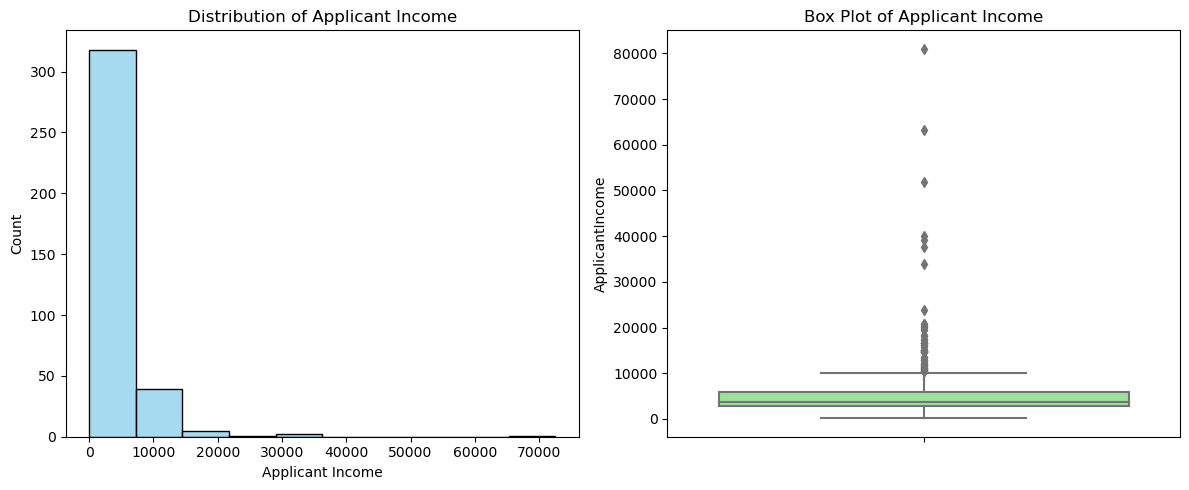

In [84]:
# Individual Variable Analysis - ApplicantIncome

# Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(test_data['ApplicantIncome'], bins=10, kde=False, color='skyblue')
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Count')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=train_data['ApplicantIncome'], color='lightgreen')
plt.title('Box Plot of Applicant Income')

plt.tight_layout()
plt.show()

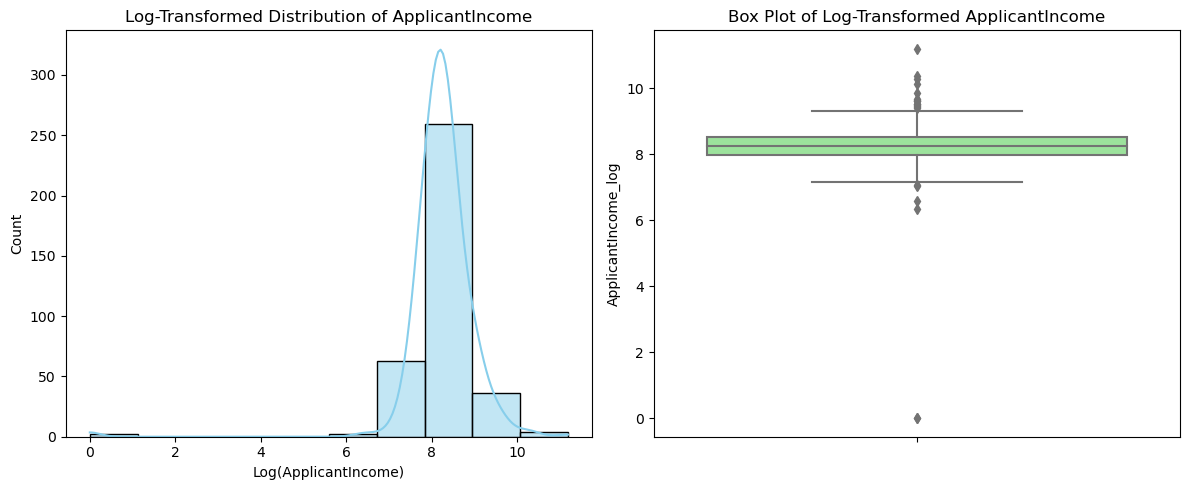

In [85]:
# Handling Extreme Values in 'ApplicantIncome' using Log Transformation

# Create a new column with log-transformed ApplicantIncome
test_data['ApplicantIncome_log'] = np.log1p(test_data['ApplicantIncome'])

# Histogram for transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(test_data['ApplicantIncome_log'], bins=10, kde=True, color='skyblue')
plt.title('Log-Transformed Distribution of ApplicantIncome')
plt.xlabel('Log(ApplicantIncome)')
plt.ylabel('Count')

# Box plot for transformation
plt.subplot(1, 2, 2)
sns.boxplot(y=test_data['ApplicantIncome_log'], color='lightgreen')
plt.title('Box Plot of Log-Transformed ApplicantIncome')

plt.tight_layout()
plt.show()

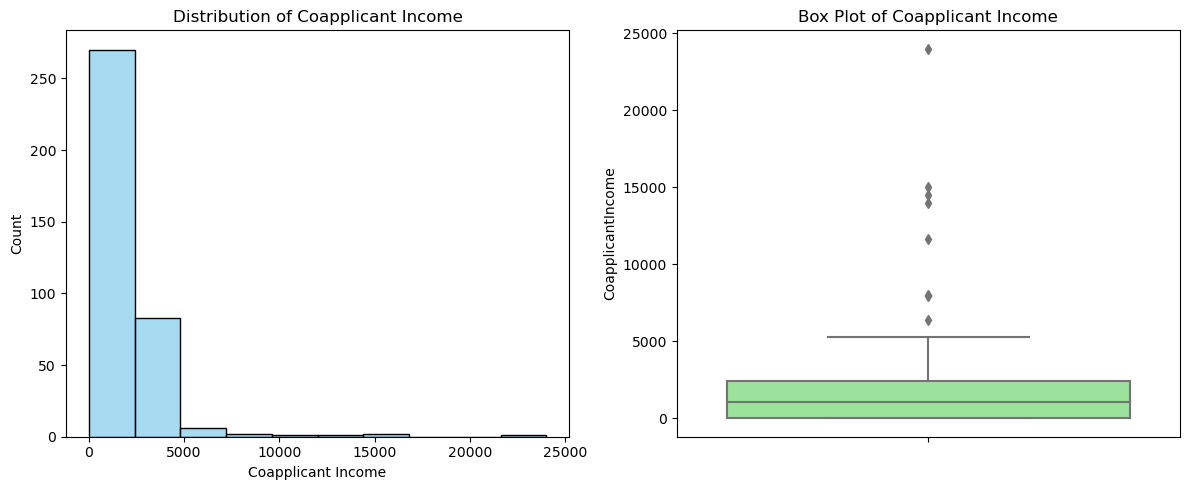

In [86]:
# Individual Variable Analysis - CoapplicantIncome

# Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(test_data['CoapplicantIncome'], bins=10, kde=False, color='skyblue')
plt.title('Distribution of Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Count')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=test_data['CoapplicantIncome'], color='lightgreen')
plt.title('Box Plot of Coapplicant Income')

plt.tight_layout()
plt.show()

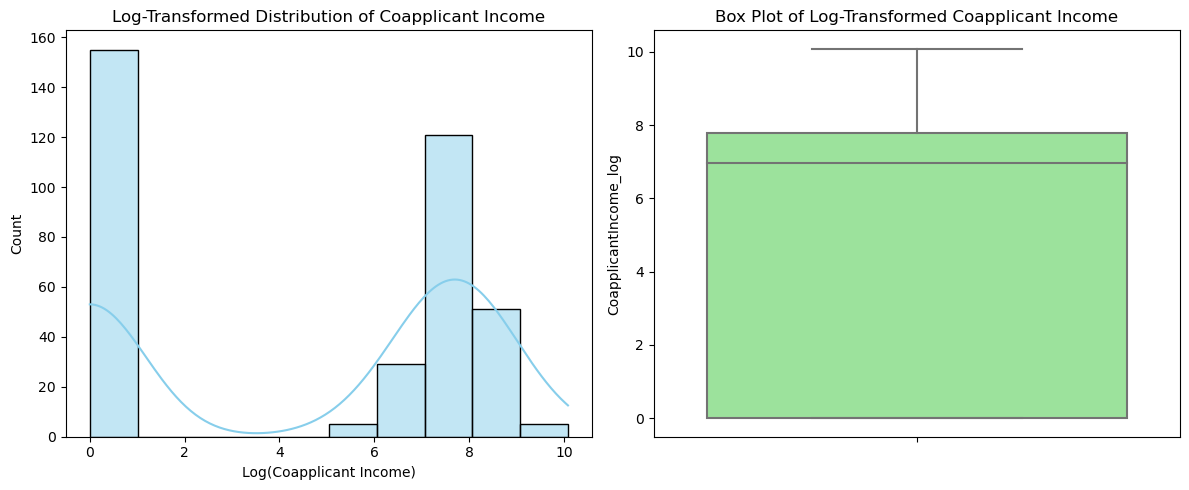

In [87]:
# Handling Extreme Values in 'CoapplicantIncome' using Log Transformation

# Create a new column with log-transformed CoapplicantIncome
test_data['CoapplicantIncome_log'] = np.log1p(test_data['CoapplicantIncome'])

# Histogram for transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(test_data['CoapplicantIncome_log'], bins=10, kde=True, color='skyblue')
plt.title('Log-Transformed Distribution of Coapplicant Income')
plt.xlabel('Log(Coapplicant Income)')
plt.ylabel('Count')

# Box plot for transformation
plt.subplot(1, 2, 2)
sns.boxplot(y=test_data['CoapplicantIncome_log'], color='lightgreen')
plt.title('Box Plot of Log-Transformed Coapplicant Income')

plt.tight_layout()
plt.show()

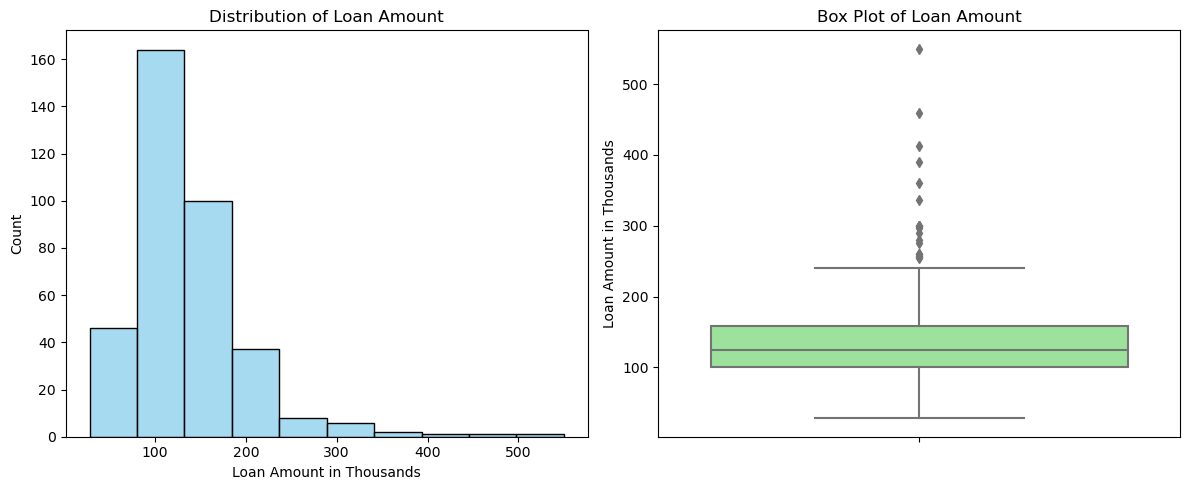

In [88]:
# Individual Variable Analysis - LoanAmount

# Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(test_data['LoanAmount'], bins=10, kde=False, color='skyblue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount in Thousands')
plt.ylabel('Count')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=test_data['LoanAmount'], color='lightgreen')
plt.title('Box Plot of Loan Amount')
plt.ylabel('Loan Amount in Thousands')

plt.tight_layout()
plt.show()

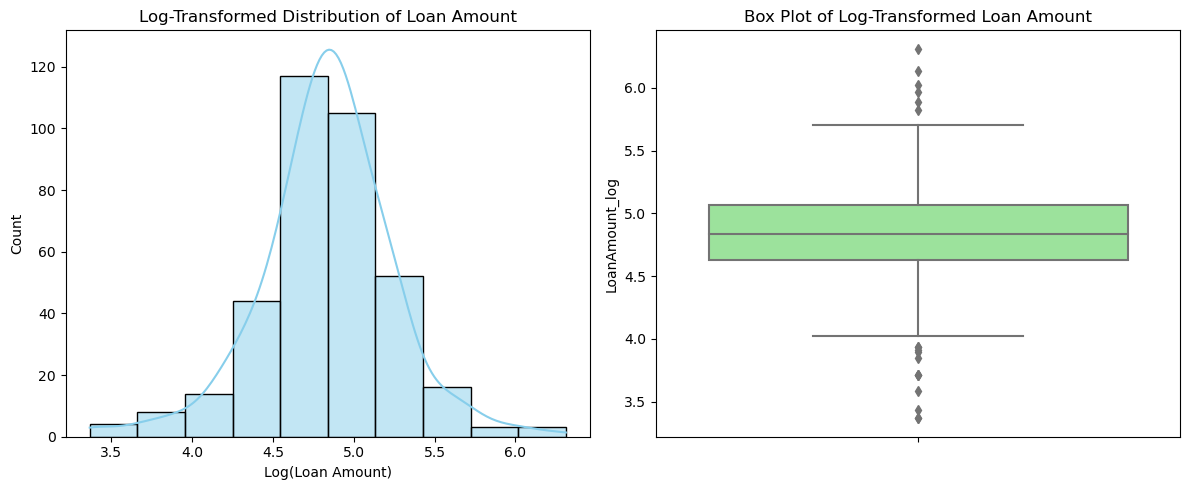

In [89]:
# Handling Extreme Values in 'LoanAmount' using Log Transformation

# Create a new column with log-transformed CoapplicantIncome
test_data['LoanAmount_log'] = np.log1p(test_data['LoanAmount'])

# Histogram for transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(test_data['LoanAmount_log'], bins=10, kde=True, color='skyblue')
plt.title('Log-Transformed Distribution of Loan Amount')
plt.xlabel('Log(Loan Amount)')
plt.ylabel('Count')

# Box plot for transformation
plt.subplot(1, 2, 2)
sns.boxplot(y=test_data['LoanAmount_log'], color='lightgreen')
plt.title('Box Plot of Log-Transformed Loan Amount')

plt.tight_layout()
plt.show()

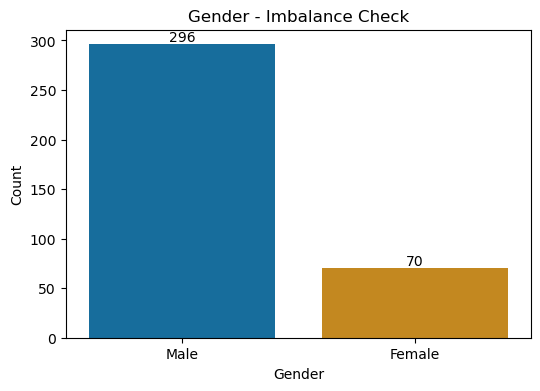

In [90]:
# Individual Variable Analysis - Gender

plt.figure(figsize=(6, 4))
sns.countplot(data=test_data, x='Gender', palette='colorblind')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender - Imbalance Check')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

plt.show()

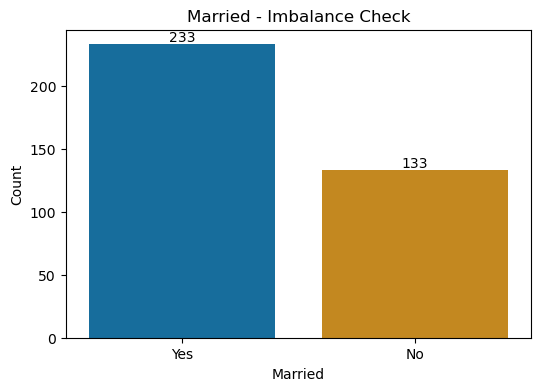

In [91]:
# Individual Variable Analysis - Married

plt.figure(figsize=(6, 4))
sns.countplot(data=test_data, x='Married', palette='colorblind')
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Married - Imbalance Check')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

plt.show()

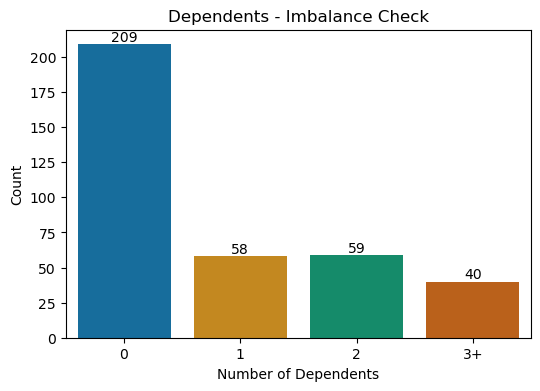

In [92]:
# Individual Variable Analysis - Dependents

plt.figure(figsize=(6, 4))
sns.countplot(data=test_data, x='Dependents', palette='colorblind')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.title('Dependents - Imbalance Check')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

plt.show()

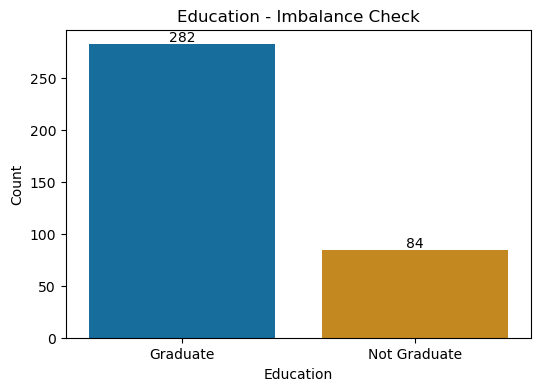

In [93]:
# Individual Variable Analysis - Education

plt.figure(figsize=(6, 4))
sns.countplot(data=test_data, x='Education', palette='colorblind')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education - Imbalance Check')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

plt.show()

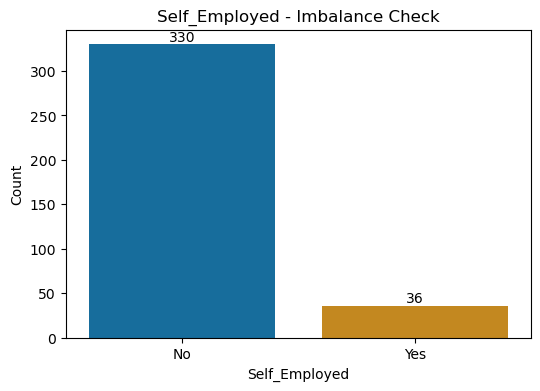

In [94]:
# Individual Variable Analysis - Self_Employed

plt.figure(figsize=(6, 4))
sns.countplot(data=test_data, x='Self_Employed', palette='colorblind')
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.title('Self_Employed - Imbalance Check')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

plt.show()

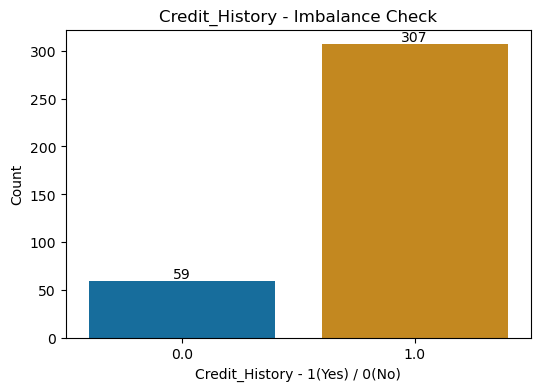

In [95]:
# Individual Variable Analysis - Credit_History

plt.figure(figsize=(6, 4))
sns.countplot(data=test_data, x='Credit_History', palette='colorblind')
plt.xlabel('Credit_History - 1(Yes) / 0(No)')
plt.ylabel('Count')
plt.title('Credit_History - Imbalance Check')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

plt.show()

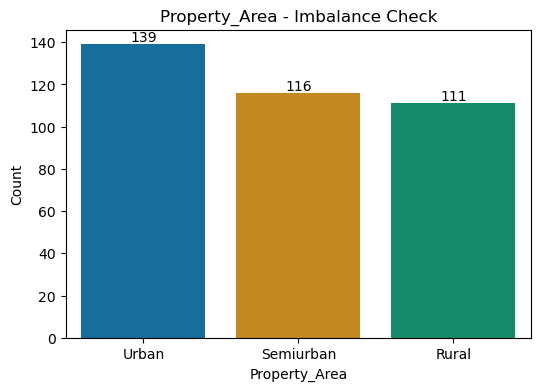

In [96]:
# Individual Variable Analysis - Property_Area

plt.figure(figsize=(6, 4))
sns.countplot(data=test_data, x='Property_Area', palette='colorblind')
plt.xlabel('Property_Area')
plt.ylabel('Count')
plt.title('Property_Area - Imbalance Check')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

plt.show()

In [97]:
# Grouping 'Loan_Amount_Term' into smaller groups for better visualization

test_data['Loan_Amount_Term_Grouped'] = test_data['Loan_Amount_Term'].apply(categorize_loan_term)
test_data['Loan_Amount_Term_Grouped'].value_counts()

Long Term         317
Medium Term        34
Very Long Term      8
Short Term          7
Name: Loan_Amount_Term_Grouped, dtype: int64

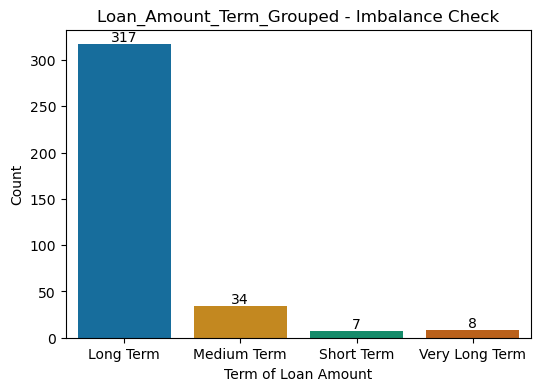

In [98]:
# Individual Variable Analysis - Loan_Amount_Term_Grouped

plt.figure(figsize=(6, 4))
sns.countplot(data=test_data, x='Loan_Amount_Term_Grouped', palette='colorblind')
plt.xlabel('Term of Loan Amount')
plt.ylabel('Count')
plt.title('Loan_Amount_Term_Grouped - Imbalance Check')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

plt.show()

In [99]:
# Imbalance data handling for 'Gender'
X_gender_test = test_data.drop(columns=['Gender'])
y_gender_test = test_data['Gender']
X_gender_test_resampled, y_gender_test_resampled = oversample.fit_resample(X_gender_test, y_gender_test)

print(f'After oversampling - Gender: {Counter(y_gender_test_resampled)}')

# Imbalance data handling for 'Married'
X_married_test = test_data.drop(columns=['Married'])
y_married_test = test_data['Married']
X_married_test_resampled, y_married_test_resampled = oversample.fit_resample(X_married_test, y_married_test)

print(f'After oversampling - Married: {Counter(y_married_test_resampled)}')

# Imbalance data handling for 'Dependents'
X_dependents_test = test_data.drop(columns=['Dependents'])
y_dependents_test = test_data['Dependents']
X_dependents_test_resampled, y_dependents_test_resampled = oversample.fit_resample(X_dependents_test, y_dependents_test)

print(f'After oversampling - Dependents: {Counter(y_dependents_test_resampled)}')

# Imbalance data handling for 'Education'
X_edu_test = test_data.drop(columns=['Education'])
y_edu_test = test_data['Education']
X_edu_test_resampled, y_edu_test_resampled = oversample.fit_resample(X_edu_test, y_edu_test)

print(f'After oversampling - Education: {Counter(y_edu_test_resampled)}')

# Imbalance data handling for 'Self_Employed'
X_selfEmployed_test = test_data.drop(columns=['Self_Employed'])
y_selfEmployed_test = test_data['Self_Employed']
X_selfEmployed_test_resampled, y_selfEmployed_test_resampled = oversample.fit_resample(X_selfEmployed_test, y_selfEmployed_test)

print(f'After oversampling - Self_Employed: {Counter(y_selfEmployed_test_resampled)}')

# Imbalance data handling for 'Credit_History'
# Convert 'Credit_History' to float temporarily for resampling
test_data['Credit_History'] = test_data['Credit_History'].astype(float) 

X_creditHist_test = test_data.drop(columns=['Credit_History'])
y_creditHist_test = test_data['Credit_History']
X_creditHist_test_resampled, y_creditHist_test_resampled = oversample.fit_resample(X_creditHist_test, y_creditHist_test)

print(f'After oversampling - Credit_History: {Counter(y_creditHist_test_resampled)}')

# Convert 'Credit_History' back to object type
y_creditHist_test_resampled = y_creditHist_test_resampled.astype(object)
test_data['Credit_History'] = test_data['Credit_History'].astype(object) 


# Imbalance data handling for 'Loan_Amount_Term_Grouped'
X_loanTerm_test = test_data.drop(columns=['Loan_Amount_Term_Grouped'])
y_loanTerm_test = test_data['Loan_Amount_Term_Grouped']
X_loanTerm_test_resampled, y_loanTerm_test_resampled = oversample.fit_resample(X_loanTerm_test, y_loanTerm_test)

print(f'After oversampling - Loan_Amount_Term_Grouped: {Counter(y_loanTerm_test_resampled)}')

After oversampling - Gender: Counter({'Male': 296, 'Female': 296})
After oversampling - Married: Counter({'Yes': 233, 'No': 233})
After oversampling - Dependents: Counter({'0': 209, '3+': 209, '2': 59, '1': 58})
After oversampling - Education: Counter({'Graduate': 282, 'Not Graduate': 282})
After oversampling - Self_Employed: Counter({'No': 330, 'Yes': 330})
After oversampling - Credit_History: Counter({1.0: 307, 0.0: 307})
After oversampling - Loan_Amount_Term_Grouped: Counter({'Long Term': 317, 'Short Term': 317, 'Medium Term': 34, 'Very Long Term': 8})


In [100]:
# Attach the resampled features to a new dataset
test_data_resampled = X_gender_test_resampled.copy()  

test_data_resampled['Gender'] = y_gender_test_resampled
test_data_resampled['Married'] = y_married_test_resampled
test_data_resampled['Dependents'] = y_dependents_test_resampled
test_data_resampled['Education'] = y_edu_test_resampled
test_data_resampled['Self_Employed'] = y_selfEmployed_test_resampled
test_data_resampled['Credit_History'] = y_creditHist_test_resampled
test_data_resampled['Loan_Amount_Term_Grouped'] = y_loanTerm_test_resampled

# Verify the shape and contents of the combined dataset to confirm successful merging
print(test_data_resampled.shape)
test_data_resampled.head()

(592, 15)


,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_Grouped,Gender
0,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,8.651899,0.000000,4.709530,Long Term,Male
1,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,8.031710,7.313887,4.844187,Long Term,Male
2,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,8.517393,7.496097,5.342334,Long Term,Male
3,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,7.758333,7.842671,4.615121,Long Term,Male
4,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,8.094684,0.000000,4.369448,Long Term,Male


In [101]:
test_data_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Married                   466 non-null    object 
 1   Dependents                535 non-null    object 
 2   Education                 564 non-null    object 
 3   Self_Employed             592 non-null    object 
 4   ApplicantIncome           592 non-null    int64  
 5   CoapplicantIncome         592 non-null    int64  
 6   LoanAmount                592 non-null    float64
 7   Loan_Amount_Term          592 non-null    object 
 8   Credit_History            592 non-null    object 
 9   Property_Area             592 non-null    object 
 10  ApplicantIncome_log       592 non-null    float64
 11  CoapplicantIncome_log     592 non-null    float64
 12  LoanAmount_log            592 non-null    float64
 13  Loan_Amount_Term_Grouped  592 non-null    object 
 14  Gender    

In [102]:
# Handling missing value for categorical variables - Mode Imputation (After Resampling)
missing_cat_test_resampled = ['Married', 'Dependents', 'Education']

for cat in missing_cat_test_resampled:
    mode_value_test_resampled = test_data_resampled[cat].mode()[0]  
    test_data_resampled[cat].fillna(mode_value_test_resampled, inplace=True)

print('[Missing Values]\n',test_data_resampled[missing_cat_test_resampled].isnull().sum(),'\n')
print('Categorical Variable: Value Counts After Mode Imputation\n')
print('-------------------------------------------------------------')
print(train_data['Married'].value_counts(),'\n')
print(train_data['Dependents'].value_counts(),'\n')
print(train_data['Education'].value_counts(),'\n')

[Missing Values]
 Married       0
Dependents    0
Education     0
dtype: int64 

Categorical Variable: Value Counts After Mode Imputation

-------------------------------------------------------------
Yes    401
No     213
Name: Married, dtype: int64 

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 



In [103]:
# Check for missing values
test_data_resampled.isnull().sum()

Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
ApplicantIncome_log         0
CoapplicantIncome_log       0
LoanAmount_log              0
Loan_Amount_Term_Grouped    0
Gender                      0
dtype: int64

In [104]:
# Label Encoding 'Married', 'Education', 'Credit_History', 'Loan_Status', 'Gender', 'Self_Employed'
test_data_resampled['Gender_encoded'] = test_data_resampled['Gender'].map({'Male': 1, 'Female': 0})
test_data_resampled['Married_encoded'] = test_data_resampled['Married'].map({'Yes': 1, 'No': 0})
test_data_resampled['Education_encoded'] = test_data_resampled['Education'].map({'Graduate': 1, 'Not Graduate': 0})
test_data_resampled['Self_Employed_encoded'] = test_data_resampled['Self_Employed'].map({'Yes': 1, 'No': 0})
test_data_resampled['Credit_History_encoded'] = test_data_resampled['Credit_History'].astype(int)

# One-hot encoding for 'Dependents'
Dependents_encoded = pd.get_dummies(test_data_resampled['Dependents'], prefix='Dependents')
test_data_resampled = pd.concat([test_data_resampled, Dependents_encoded], axis=1)

# One-hot encoding for 'Property_Area'
Property_Area_encoded = pd.get_dummies(test_data_resampled['Property_Area'], prefix='Property_Area')
test_data_resampled = pd.concat([test_data_resampled, Property_Area_encoded], axis=1)

# One-hot encoding for 'Loan_Amount_Term_Grouped'
LoanTerm_encoded = pd.get_dummies(test_data_resampled['Loan_Amount_Term_Grouped'], prefix='Loan_Amount_Term_Grouped')
test_data_resampled = pd.concat([test_data_resampled, LoanTerm_encoded], axis=1)

# Display the outcome after encoding
encoded_columns_test = ['Gender_encoded', 'Married_encoded', 'Education_encoded', 'Self_Employed_encoded', 'Credit_History_encoded'] +  list(Dependents_encoded.columns) + list(Property_Area_encoded.columns) + list(LoanTerm_encoded.columns)
test_data_resampled[encoded_columns_test].head()

,Gender_encoded,Married_encoded,Education_encoded,Self_Employed_encoded,Credit_History_encoded,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_Grouped_Long Term,Loan_Amount_Term_Grouped_Medium Term,Loan_Amount_Term_Grouped_Short Term,Loan_Amount_Term_Grouped_Very Long Term
0,1,1,1,0,1,1,0,0,0,0,0,1,1,0,0,0
1,1,1,1,0,1,0,1,0,0,0,0,1,1,0,0,0
2,1,1,1,0,1,0,0,1,0,0,0,1,1,0,0,0
3,1,1,1,0,1,0,0,1,0,0,0,1,1,0,0,0
4,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0


In [105]:
test_data_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Married                                  592 non-null    object 
 1   Dependents                               592 non-null    object 
 2   Education                                592 non-null    object 
 3   Self_Employed                            592 non-null    object 
 4   ApplicantIncome                          592 non-null    int64  
 5   CoapplicantIncome                        592 non-null    int64  
 6   LoanAmount                               592 non-null    float64
 7   Loan_Amount_Term                         592 non-null    object 
 8   Credit_History                           592 non-null    object 
 9   Property_Area                            592 non-null    object 
 10  ApplicantIncome_log                      592 non-n

### Implementing Test Dataset on rf_model_2

In [106]:
# Define new feature set
X_test_rf2 = test_data_resampled[['Gender_encoded', 'Married_encoded', 'Education_encoded', 'Self_Employed_encoded', 'Credit_History_encoded', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Amount_Term_Grouped_Long Term', 'Loan_Amount_Term_Grouped_Medium Term', 'Loan_Amount_Term_Grouped_Short Term', 'Loan_Amount_Term_Grouped_Very Long Term', 'ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log']]

In [107]:
# Make predictions on the test set
y_pred_test_rf2 = rf_model_2.predict(X_test_rf2)

# Store predictions in a new column in the test dataset
test_data_resampled['Loan_Status_Prediction_rf2'] = y_pred_test_rf2

# Save predictions to a CSV file for future use
test_data_resampled[['Loan_Status_Prediction_rf2']].to_csv('test_predictions_rf2.csv', index=False)

# Display the first few rows of the test data with predictions to verify
print(test_data_resampled[['Loan_Status_Prediction_rf2']].head())

   Loan_Status_Prediction_rf2
0                           1
1                           1
2                           1
3                           1
4                           1


In [108]:
# Count the number of each prediction type
prediction_counts_rf2 = test_data_resampled['Loan_Status_Prediction_rf2'].value_counts()
print(prediction_counts_rf2)

1    301
0    291
Name: Loan_Status_Prediction_rf2, dtype: int64


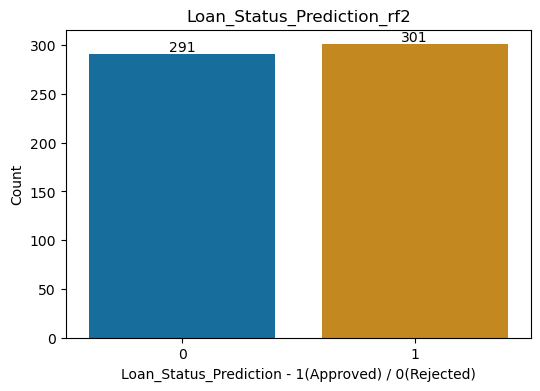

In [109]:
plt.figure(figsize=(6, 4))
sns.countplot(data=test_data_resampled, x='Loan_Status_Prediction_rf2', palette='colorblind')
plt.xlabel('Loan_Status_Prediction - 1(Approved) / 0(Rejected)')
plt.ylabel('Count')
plt.title('Loan_Status_Prediction_rf2')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

plt.show()

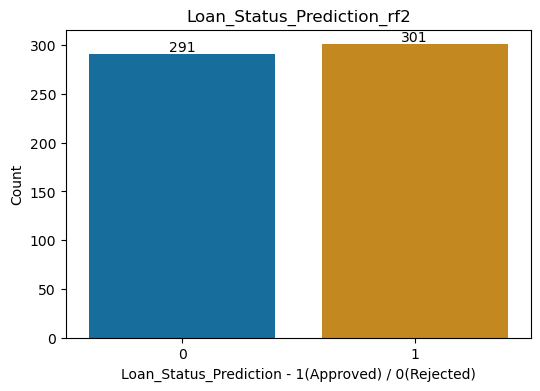

In [110]:
plt.figure(figsize=(6, 4))
sns.countplot(data=test_data_resampled, x='Loan_Status_Prediction_rf2', palette='colorblind')
plt.xlabel('Loan_Status_Prediction - 1(Approved) / 0(Rejected)')
plt.ylabel('Count')
plt.title('Loan_Status_Prediction_rf2')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

plt.show()

In [111]:
# Convert 'Loan_Status_Prediction' back to object data type for visualization
test_data_resampled['Loan_Status_Prediction_rf2'] = test_data_resampled['Loan_Status_Prediction_rf2'].astype(object) 

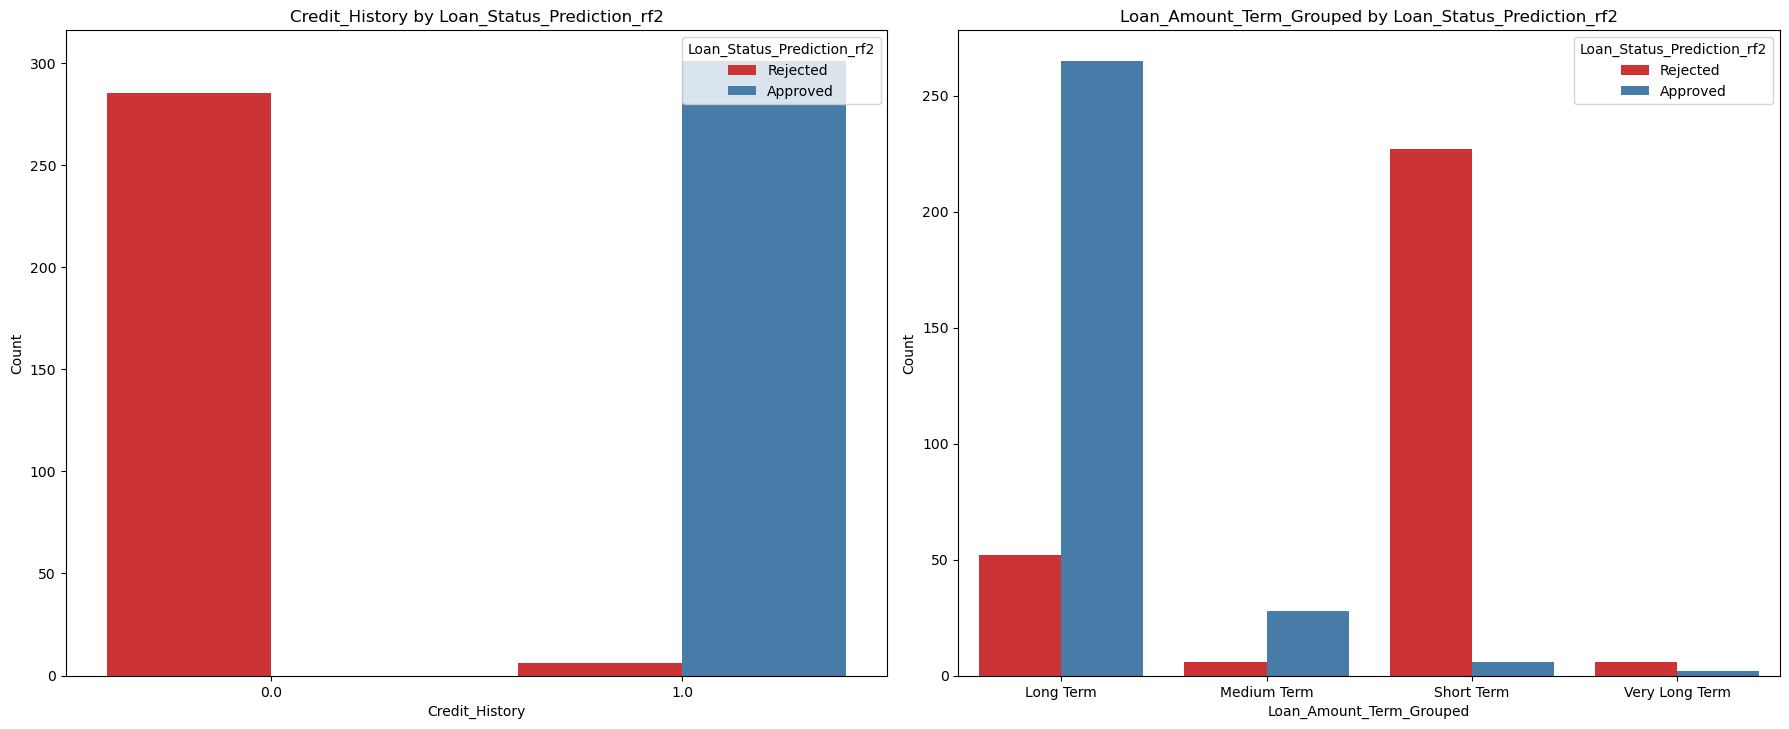

In [112]:
# Define a list of significant categorical features to loop through
cat_features_test = ['Credit_History', 'Loan_Amount_Term_Grouped',]

plt.figure(figsize=(18, 14))

# Loop through each categorical feature and plot against Loan_Status_Prediction
for i, feature in enumerate(cat_features_test, 1):
    plt.subplot(2, 2, i) 
    sns.countplot(data=test_data_resampled, x=feature, hue='Loan_Status_Prediction_rf2', palette='Set1')
    plt.title(f'{feature} by Loan_Status_Prediction_rf2')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Loan_Status_Prediction_rf2', labels=['Rejected', 'Approved'])
    plt.xticks()

plt.tight_layout()
plt.show()

In [113]:
test_loanstatLoanTermShort_counts = test_data_resampled.groupby(['Loan_Status_Prediction_rf2', 'Loan_Amount_Term_Grouped']).size().unstack(fill_value=0)
print("Test Set Distribution of Loan Status Prediction by Loan Amount Term Grouped:")
print(test_loanstatLoanTermShort_counts)

Test Set Distribution of Loan Status Prediction by Loan Amount Term Grouped:
Loan_Amount_Term_Grouped    Long Term  Medium Term  Short Term  Very Long Term
Loan_Status_Prediction_rf2                                                    
0                                  52            6         227               6
1                                 265           28           6               2


### Evaluation Metrics for Test Dataset (rf_model_2)

In [114]:
X_test_eval = train_data_resampled[['Gender_encoded', 'Married_encoded', 'Education_encoded', 'Self_Employed_encoded', 'Credit_History_encoded', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Amount_Term_Grouped_Long Term', 'Loan_Amount_Term_Grouped_Medium Term', 'Loan_Amount_Term_Grouped_Short Term', 'Loan_Amount_Term_Grouped_Very Long Term', 'ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log']]
y_test_eval = train_data_resampled['Loan_Status_encoded']

# Split into training and test sets
X_train_eval, X_test_rf2_eval, y_train_eval, y_test_eval = train_test_split(X_test_eval, y_test_eval, test_size=0.2, random_state=42)

In [115]:
y_test_pred_rf2 = rf_model_2.predict(X_test_rf2_eval)
y_test_proba_rf2 = rf_model_2.predict_proba(X_test_rf2_eval)[:, 1] 

accuracy_test_rf2 = accuracy_score(y_test_eval, y_test_pred_rf2)
precision_test_rf2 = precision_score(y_test_eval, y_test_pred_rf2)
recall_test_rf2 = recall_score(y_test_eval, y_test_pred_rf2)
f1_test_rf2 = f1_score(y_test_eval, y_test_pred_rf2)
auc_roc_test_rf2 = roc_auc_score(y_test_eval, y_test_proba_rf2)
conf_matrix_test_rf2 = confusion_matrix(y_test_eval, y_test_pred_rf2)


print("rf_model_2 Evaluation on Test Dataset:")
print(f"Accuracy: {accuracy_test_rf2:.2f}")
print(f"Precision: {precision_test_rf2:.2f}")
print(f"Recall: {recall_test_rf2:.2f}")
print(f"F1 Score: {f1_test_rf2:.2f}")
print(f"AUC-ROC: {auc_roc_test_rf2:.2f}")
print("Confusion Matrix (Actual vs. Predicted):")
print(conf_matrix_test_rf2)
print('')

cross_val_scores_test_rf2 = cross_validate(rf_model_2, X_train_eval, y_train_eval, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
print(f"Cross-Validation Accuracy: {cross_val_scores_test_rf2['test_accuracy'].mean():.2f} ± {cross_val_scores_test_rf2['test_accuracy'].std():.2f}")
print(f"Cross-Validation Precision: {cross_val_scores_test_rf2['test_precision'].mean():.2f} ± {cross_val_scores_test_rf2['test_precision'].std():.2f}")
print(f"Cross-Validation Recall: {cross_val_scores_test_rf2['test_recall'].mean():.2f} ± {cross_val_scores_test_rf2['test_recall'].std():.2f}")
print(f"Cross-Validation F1 Score: {cross_val_scores_test_rf2['test_f1'].mean():.2f} ± {cross_val_scores_test_rf2['test_f1'].std():.2f}")

rf_model_2 Evaluation on Test Dataset:
Accuracy: 0.88
Precision: 0.81
Recall: 0.97
F1 Score: 0.88
AUC-ROC: 0.91
Confusion Matrix (Actual vs. Predicted):
[[85 22]
 [ 3 91]]

Cross-Validation Accuracy: 0.88 ± 0.03
Cross-Validation Precision: 0.79 ± 0.05
Cross-Validation Recall: 0.97 ± 0.02
Cross-Validation F1 Score: 0.87 ± 0.03


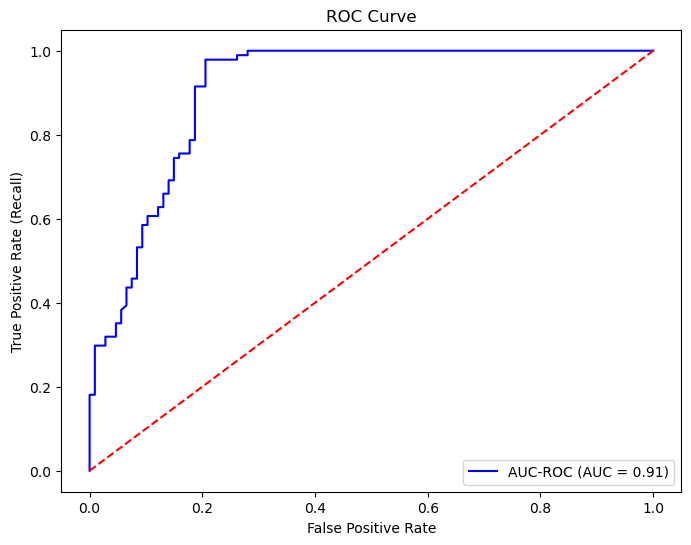

In [116]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test_eval, y_test_proba_rf2)
auc_roc_test_rf2 = roc_auc_score(y_test_eval, y_test_proba_rf2)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC-ROC (AUC = {auc_roc_test_rf2:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Feature Importance odf rf_model_2

In [117]:
importances_rf2 = rf_model_2.feature_importances_
for feature, importance in zip(X_train.columns, importances_rf2):
    print(f"{feature}: {importance:.4f}")

Gender_encoded: 0.0223
Married_encoded: 0.0856
Education_encoded: 0.0036
Self_Employed_encoded: 0.0306
Credit_History_encoded: 0.3856
Dependents_0: 0.0020
Dependents_1: 0.0082
Dependents_2: 0.0046
Dependents_3+: 0.0807
Property_Area_Rural: 0.0017
Property_Area_Semiurban: 0.0042
Property_Area_Urban: 0.0015
Loan_Amount_Term_Grouped_Long Term: 0.1186
Loan_Amount_Term_Grouped_Medium Term: 0.0171
Loan_Amount_Term_Grouped_Short Term: 0.1622
Loan_Amount_Term_Grouped_Very Long Term: 0.0051
ApplicantIncome_log: 0.0267
CoapplicantIncome_log: 0.0223
LoanAmount_log: 0.0173
